### 1. Import libraries

In [41]:
import numpy as np
import pandas as pd
import os, os.path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import imutils
import time
import glob as glob
from ultralytics import YOLO
from ultralytics.utils.plotting import colors
from PIL import Image
from torchvision import transforms
from torch.serialization import add_safe_globals
from scipy import signal

### 2. Count the number of images and videos in the directories

In [4]:
#Print the numbers of images
DIR1 = './Images'
DIR2 = './Video Fights for Learning'

No_of_images = sum([len(files) for _, _, files in os.walk(DIR1)])
print("Number of images in the directory: ", No_of_images)
No_of_videos = sum([len(files) for _, _, files in os.walk(DIR2)])
print("Number of videos in the directory: ", No_of_videos)

Number of images in the directory:  400
Number of videos in the directory:  1304


### 3. Human Detection using YOLO COCO


image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\2.jpg: 640x448 2 persons, 59.6ms
Speed: 1.5ms preprocess, 59.6ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 448)
Person detected: box=[80, 143, 157, 389], confidence=0.93
Person detected: box=[157, 161, 237, 389], confidence=0.92


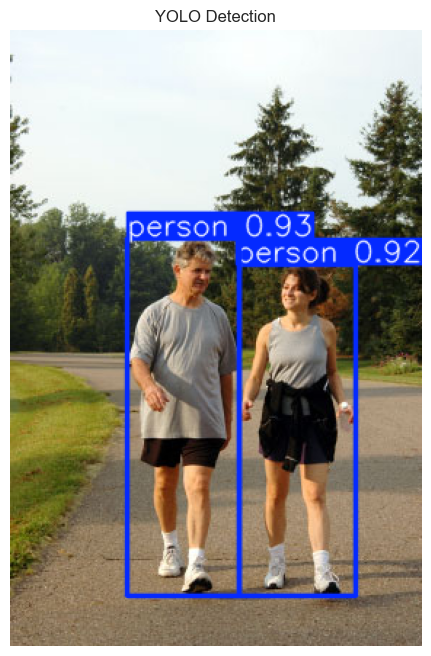

In [4]:
model = YOLO("yolo11n.pt")

results = model('Images/not_fighting/2.jpg')
for result in results:  # results is a list where each item corresponds to one image
    boxes = result.boxes  # Bounding boxes for all detected objects
    for box in boxes:
        class_id = int(box.cls)
        if model.names[class_id] == 'person':
            # Convert box coordinates to integers for drawing
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)
            print(f"Person detected: box={[x1, y1, x2, y2]}, confidence={conf:.2f}")

# To display the image with detections
img = cv2.imread('Images/not_fighting/2.jpg')
res_plotted = results[0].plot()  # This automatically plots the detection results

# Display using matplotlib (recommended for Jupyter)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLO Detection')
plt.show()

In [6]:
# Run the model on all images in the non_fighting folder, plot them and save the plot image into another directory
input_dir = './Images/not_fighting'
output_dir = './Processed_Images/not_fighting'
model = YOLO("yolo11n.pt")

os.makedirs(output_dir, exist_ok=True)

for root, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(root, file)

            results = model(file_path)           # faster to pass the path
            res      = results[0]                # one image → one Results obj
            annotated = res.plot()               # numpy array, BGR
            full_out  = os.path.join(
                output_dir, f'{os.path.splitext(file)[0]}_det.jpg')
            cv2.imwrite(full_out, annotated)
            print('Saved annotated frame:', full_out)


image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\1.jpg: 448x640 2 persons, 44.8ms
Speed: 2.3ms preprocess, 44.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Saved annotated frame: ./Processed_Images/not_fighting\1_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\10.jpg: 448x640 2 persons, 32.0ms
Speed: 2.3ms preprocess, 32.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Saved annotated frame: ./Processed_Images/not_fighting\10_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\100.jpg: 384x640 2 persons, 1 couch, 43.7ms
Speed: 1.2ms preprocess, 43.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Saved annotated frame: ./Processed_Images/not_fighting\100_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\101.jpg: 448x640 2 persons, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Saved annotated fram

In [7]:
# Run the model on all images in the fighting folder, plot them and save the plot image into another directory
input_dir = './Images/fighting'
output_dir = './Processed_Images/fighting'
model = YOLO("yolo11n.pt")

os.makedirs(output_dir, exist_ok=True)

for root, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(root, file)

            results = model(file_path)           # faster to pass the path
            res      = results[0]                # one image → one Results obj
            annotated = res.plot()               # numpy array, BGR
            full_out  = os.path.join(
                output_dir, f'{os.path.splitext(file)[0]}_det.jpg')
            cv2.imwrite(full_out, annotated)
            print('Saved annotated frame:', full_out)


image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\1 (2).jpg: 448x640 3 persons, 1 tennis racket, 46.8ms
Speed: 1.3ms preprocess, 46.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
Saved annotated frame: ./Processed_Images/fighting\1 (2)_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\105 (2).jpg: 384x640 3 persons, 47.0ms
Speed: 1.2ms preprocess, 47.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Saved annotated frame: ./Processed_Images/fighting\105 (2)_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\107 (2).jpg: 384x640 8 persons, 25.4ms
Speed: 1.0ms preprocess, 25.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Saved annotated frame: ./Processed_Images/fighting\107 (2)_det.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\107.jpg: 448x640 9 persons, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Saved annotate

***Calculate the overlapping of the bounding boxes (Intersection)***

In [5]:
def compute_overlap_percentage(box1, box2):
    """
    Calculate the overlap percentage between two bounding boxes.
    Returns the percentage of overlap relative to the smaller box.

    Args:
        box1, box2: [x1, y1, x2, y2] format

    Returns:
        float: Overlap percentage (0.0 to 1.0)
    """
    # Calculate intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    # Check if there's any intersection
    if x1_inter >= x2_inter or y1_inter >= y2_inter:
        return 0.0

    # Calculate intersection area
    intersection_area = (x2_inter - x1_inter) * (y2_inter - y1_inter)

    # Calculate areas of both boxes
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Use the smaller box as reference for percentage calculation
    smaller_area = min(area1, area2)

    # Return overlap percentage relative to smaller box
    if smaller_area == 0:
        return 0.0

    return intersection_area / smaller_area

def compute_horizontal_overlap_percentage(box1, box2):
    """
    Calculate horizontal overlap percentage between two boxes.
    Useful for detecting side-by-side interactions.
    """
    x1_inter = max(box1[0], box2[0])
    x2_inter = min(box1[2], box2[2])

    if x1_inter >= x2_inter:
        return 0.0

    overlap_width = x2_inter - x1_inter
    width1 = box1[2] - box1[0]
    width2 = box2[2] - box2[0]
    smaller_width = min(width1, width2)

    return overlap_width / smaller_width if smaller_width > 0 else 0.0

def compute_vertical_overlap_percentage(box1, box2):
    """
    Calculate vertical overlap percentage between two boxes.
    Useful for detecting height-based interactions.
    """
    y1_inter = max(box1[1], box2[1])
    y2_inter = min(box1[3], box2[3])

    if y1_inter >= y2_inter:
        return 0.0

    overlap_height = y2_inter - y1_inter
    height1 = box1[3] - box1[1]
    height2 = box2[3] - box2[1]
    smaller_height = min(height1, height2)

    return overlap_height / smaller_height if smaller_height > 0 else 0.0

def detect_fight(img_path, model,
                overlap_threshold=0.3,      # 15% overlap threshold (was 0.15)
                horizontal_threshold=0.6,    # 30% horizontal overlap (was 0.3)
                vertical_threshold=0.7,      # 50% vertical overlap (was 0.5)
                distance_threshold=75,      # pixel distance between centers (was 100)
                expand_ratio=0.05,           # box expansion ratio (was 0.1)
                min_box_area=1000):          # minimum box area to consider (was 500)
    """
    Enhanced fight detection using percentage-based overlap analysis.

    Args:
        img_path (str): Path to the image
        model: YOLO model object
        overlap_threshold (float): Overall overlap percentage threshold (0.0-1.0)
        horizontal_threshold (float): Horizontal overlap percentage threshold
        vertical_threshold (float): Vertical overlap percentage threshold
        distance_threshold (int): Maximum distance between box centers (pixels)
        expand_ratio (float): How much to expand bounding boxes
        min_box_area (int): Minimum box area to consider valid detection

    Returns:
        tuple: (is_fight: bool, detection_info: dict)
    """
    results = model(img_path)
    person_boxes = []

    # Extract person detections
    for r in results:
        for box in r.boxes:
            if int(box.cls) == 0:  # person class
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

                # Filter out very small detections
                box_area = (x2 - x1) * (y2 - y1)
                if box_area >= min_box_area:
                    person_boxes.append([x1, y1, x2, y2])

    if len(person_boxes) < 2:
        return False, {"reason": "insufficient_people", "person_count": len(person_boxes)}

    # Expand bounding boxes (because people might throw punch outside of their body box)
    expanded_boxes = []
    for (x1, y1, x2, y2) in person_boxes:
        w, h = x2 - x1, y2 - y1
        x1_exp = max(0, x1 - int(w * expand_ratio))
        y1_exp = max(0, y1 - int(h * expand_ratio))
        x2_exp = x2 + int(w * expand_ratio)
        y2_exp = y2 + int(h * expand_ratio)
        expanded_boxes.append([x1_exp, y1_exp, x2_exp, y2_exp])

    # Analyze all pairs of people
    max_overlap = 0.0
    max_horizontal = 0.0
    max_vertical = 0.0
    min_distance = float('inf')
    fight_detected = False
    detection_details = []

    for i in range(len(expanded_boxes)):
        for j in range(i + 1, len(expanded_boxes)):
            box1, box2 = expanded_boxes[i], expanded_boxes[j]

            # Calculate different overlap metrics
            overall_overlap = compute_overlap_percentage(box1, box2)
            horizontal_overlap = compute_horizontal_overlap_percentage(box1, box2)
            vertical_overlap = compute_vertical_overlap_percentage(box1, box2)

            # Calculate distance between centers
            cx1 = (box1[0] + box1[2]) / 2
            cy1 = (box1[1] + box1[3]) / 2
            cx2 = (box2[0] + box2[2]) / 2
            cy2 = (box2[1] + box2[3]) / 2
            distance = ((cx1 - cx2)**2 + (cy1 - cy2)**2) ** 0.5

            # Track maximums
            max_overlap = max(max_overlap, overall_overlap)
            max_horizontal = max(max_horizontal, horizontal_overlap)
            max_vertical = max(max_vertical, vertical_overlap)
            min_distance = min(min_distance, distance)

            # Store details for this pair
            pair_info = {
                'pair': (i, j),
                'overall_overlap': overall_overlap,
                'horizontal_overlap': horizontal_overlap,
                'vertical_overlap': vertical_overlap,
                'distance': distance
            }
            detection_details.append(pair_info)

            # Fight detection logic - multiple criteria
            fight_conditions = [
                overall_overlap >= overlap_threshold,
                (horizontal_overlap >= horizontal_threshold and
                 vertical_overlap >= vertical_threshold),
                (distance <= distance_threshold and overall_overlap > 0.05)
            ]

            if any(fight_conditions):
                fight_detected = True
                pair_info['fight_reason'] = []
                if overall_overlap >= overlap_threshold:
                    pair_info['fight_reason'].append(f"high_overlap_{overall_overlap:.3f}")
                if (horizontal_overlap >= horizontal_threshold and
                    vertical_overlap >= vertical_threshold):
                    pair_info['fight_reason'].append(f"significant_h{horizontal_overlap:.3f}_v{vertical_overlap:.3f}")
                if (distance <= distance_threshold and overall_overlap > 0.05):
                    pair_info['fight_reason'].append(f"close_distance_{distance:.1f}")

    # Compile detection info
    detection_info = {
        "fight_detected": fight_detected,
        "person_count": len(person_boxes),
        "max_overall_overlap": max_overlap,
        "max_horizontal_overlap": max_horizontal,
        "max_vertical_overlap": max_vertical,
        "min_distance": min_distance,
        "person_boxes": person_boxes,
        "expanded_boxes": expanded_boxes,
        "pair_details": detection_details,
        "thresholds_used": {
            "overlap": overlap_threshold,
            "horizontal": horizontal_threshold,
            "vertical": vertical_threshold,
            "distance": distance_threshold
        }
    }

    return fight_detected, detection_info

# Helper function to print detailed results
def print_fight_analysis(img_path, detection_info):
    """Print detailed analysis of fight detection results"""
    info = detection_info
    print(f"\n--- Analysis for {img_path} ---")
    print(f"Fight Detected: {info['fight_detected']}")
    print(f"People Found: {info['person_count']}")
    print(f"Max Overall Overlap: {info['max_overall_overlap']:.3f}")
    print(f"Max Horizontal Overlap: {info['max_horizontal_overlap']:.3f}")
    print(f"Max Vertical Overlap: {info['max_vertical_overlap']:.3f}")
    print(f"Min Distance: {info['min_distance']:.1f} pixels")

    if info['fight_detected']:
        print("\nFight indicators:")
        for pair in info['pair_details']:
            if 'fight_reason' in pair:
                print(f"  Pair {pair['pair']}: {', '.join(pair['fight_reason'])}")


In [6]:
# Test the improved detect_fight function on a sample image
img_path = "Processed_Images/fighting/2_det.jpg"
fight_detected, info = detect_fight(img_path, model)
print_fight_analysis(img_path, info)


image 1/1 D:\Final\Violence-Detection-ML\Processed_Images\fighting\2_det.jpg: 480x640 4 persons, 1 horse, 63.2ms
Speed: 1.6ms preprocess, 63.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

--- Analysis for Processed_Images/fighting/2_det.jpg ---
Fight Detected: True
People Found: 4
Max Overall Overlap: 1.000
Max Horizontal Overlap: 1.000
Max Vertical Overlap: 1.000
Min Distance: 126.3 pixels

Fight indicators:
  Pair (0, 1): high_overlap_1.000, significant_h1.000_v1.000
  Pair (1, 3): high_overlap_1.000, significant_h1.000_v1.000


In [7]:
# Loop over all images and collect results for evaluation

# Lists to store results
all_true_labels = []
all_predicted_labels = []
all_filenames = []

print("Processing fighting images...")
fighting_dir = './Images/fighting'
fighting_files = [f for f in os.listdir(fighting_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

for i, filename in enumerate(fighting_files):
    img_path = os.path.join(fighting_dir, filename)
    try:
        fight_detected, detection_info = detect_fight(img_path, model)

        all_true_labels.append(1)  # True label: Fighting
        all_predicted_labels.append(1 if fight_detected else 0)
        all_filenames.append(f"fighting/{filename}")

        if (i + 1) % 20 == 0:
            print(f"  Processed {i + 1}/{len(fighting_files)} fighting images")

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        continue

print("\nProcessing not-fighting images...")
not_fighting_dir = './Images/not_fighting'
not_fighting_files = [f for f in os.listdir(not_fighting_dir)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

for i, filename in enumerate(not_fighting_files):
    img_path = os.path.join(not_fighting_dir, filename)
    try:
        fight_detected, detection_info = detect_fight(img_path, model)

        all_true_labels.append(0)  # True label: Not Fighting
        all_predicted_labels.append(1 if fight_detected else 0)
        all_filenames.append(f"not_fighting/{filename}")

        if (i + 1) % 20 == 0:
            print(f"  Processed {i + 1}/{len(not_fighting_files)} not-fighting images")

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        continue

print(f"\nTotal images processed: {len(all_true_labels)}")
print(f"Fighting images: {len(fighting_files)}")
print(f"Not-fighting images: {len(not_fighting_files)}")


Processing fighting images...

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\1 (2).jpg: 448x640 3 persons, 1 tennis racket, 54.9ms
Speed: 1.4ms preprocess, 54.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\105 (2).jpg: 384x640 3 persons, 55.5ms
Speed: 1.8ms preprocess, 55.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\107 (2).jpg: 384x640 8 persons, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\107.jpg: 448x640 9 persons, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\108 (2).jpg: 544x640 12 persons, 55.6ms
Speed: 3.1ms preprocess, 55.6ms inference, 1.1ms postprocess per image at shape (1, 3, 


Overall Accuracy: 0.5950

Classification Report:
              precision    recall  f1-score   support

Not Fighting       0.62      0.51      0.55       200
    Fighting       0.58      0.69      0.63       200

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400


Confusion Matrix:
[[101  99]
 [ 63 137]]


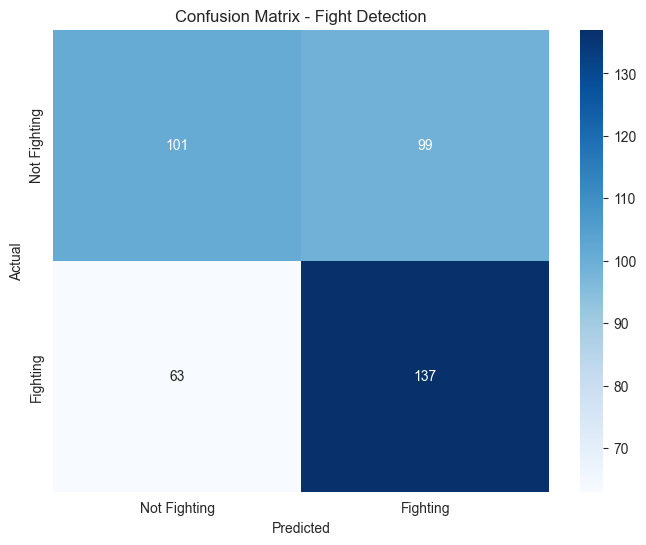


Detailed Results:
True Positives (Correctly detected fights): 137
True Negatives (Correctly detected non-fights): 101
False Positives (Non-fights detected as fights): 99
False Negatives (Fights missed): 63

False Positive Rate: 0.4950
False Negative Rate: 0.3150


In [8]:
# Generate classification report and confusion matrix

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predicted_labels)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Generate classification report
class_names = ['Not Fighting', 'Fighting']
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predicted_labels, target_names=class_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Fight Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print some error analysis
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\nDetailed Results:")
print(f"True Positives (Correctly detected fights): {tp}")
print(f"True Negatives (Correctly detected non-fights): {tn}")
print(f"False Positives (Non-fights detected as fights): {fp}")
print(f"False Negatives (Fights missed): {fn}")

if fp > 0:
    print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
if fn > 0:
    print(f"False Negative Rate: {fn/(fn+tp):.4f}")


### CNN Training with PyTorch ResNet50

In [9]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version PyTorch was compiled with: {torch.version.cuda}")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA version PyTorch was compiled with: 12.6


In [10]:
# Import additional libraries for CNN training
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
import shutil
from PIL import Image
import copy
import random

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

Using device: cuda


In [11]:
# Data preparation - Create train/val/test splits
def prepare_cnn_data(source_dir, target_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Prepare data splits for CNN training
    """
    # Create target directory structure
    splits = ['train', 'val', 'test']
    classes = ['fighting', 'not_fighting']

    for split in splits:
        for class_name in classes:
            os.makedirs(os.path.join(target_dir, split, class_name), exist_ok=True)

    # Process each class
    all_files_info = []

    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        if os.path.exists(class_path):
            files = [f for f in os.listdir(class_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

            # Shuffle files
            random.shuffle(files)

            # Calculate split sizes
            total_files = len(files)
            train_size = int(total_files * train_ratio)
            val_size = int(total_files * val_ratio)

            # Split files
            train_files = files[:train_size]
            val_files = files[train_size:train_size + val_size]
            test_files = files[train_size + val_size:]

            # Copy files to appropriate directories
            for split, file_list in [('train', train_files), ('val', val_files), ('test', test_files)]:
                for file in file_list:
                    src = os.path.join(class_path, file)
                    dst = os.path.join(target_dir, split, class_name, file)
                    shutil.copy2(src, dst)

            all_files_info.append({
                'class': class_name,
                'total': total_files,
                'train': len(train_files),
                'val': len(val_files),
                'test': len(test_files)
            })

            print(f"{class_name}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test")

    return all_files_info

# Prepare the data splits
cnn_data_dir = './CNN_Data'
data_info = prepare_cnn_data('./Images', cnn_data_dir)

print(f"\nData preparation complete!")
print(f"CNN training data saved to: {cnn_data_dir}")

fighting: 140 train, 30 val, 30 test
not_fighting: 140 train, 30 val, 30 test

Data preparation complete!
CNN training data saved to: ./CNN_Data


In [12]:
# Define data transforms with augmentation
# Training transforms (with augmentation - CLEARLY DIFFERENT FROM NORMAL DATA)
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Validation and test transforms (NO AUGMENTATION - NORMAL DATA)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = ImageFolder(root=os.path.join(cnn_data_dir, 'train'), transform=train_transforms)
val_dataset = ImageFolder(root=os.path.join(cnn_data_dir, 'val'), transform=val_test_transforms)
test_dataset = ImageFolder(root=os.path.join(cnn_data_dir, 'test'), transform=val_test_transforms)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Class names: {train_dataset.classes}")
print(f"Class indices: {train_dataset.class_to_idx}")

Training samples: 280
Validation samples: 60
Test samples: 60
Class names: ['fighting', 'not_fighting']
Class indices: {'fighting': 0, 'not_fighting': 1}


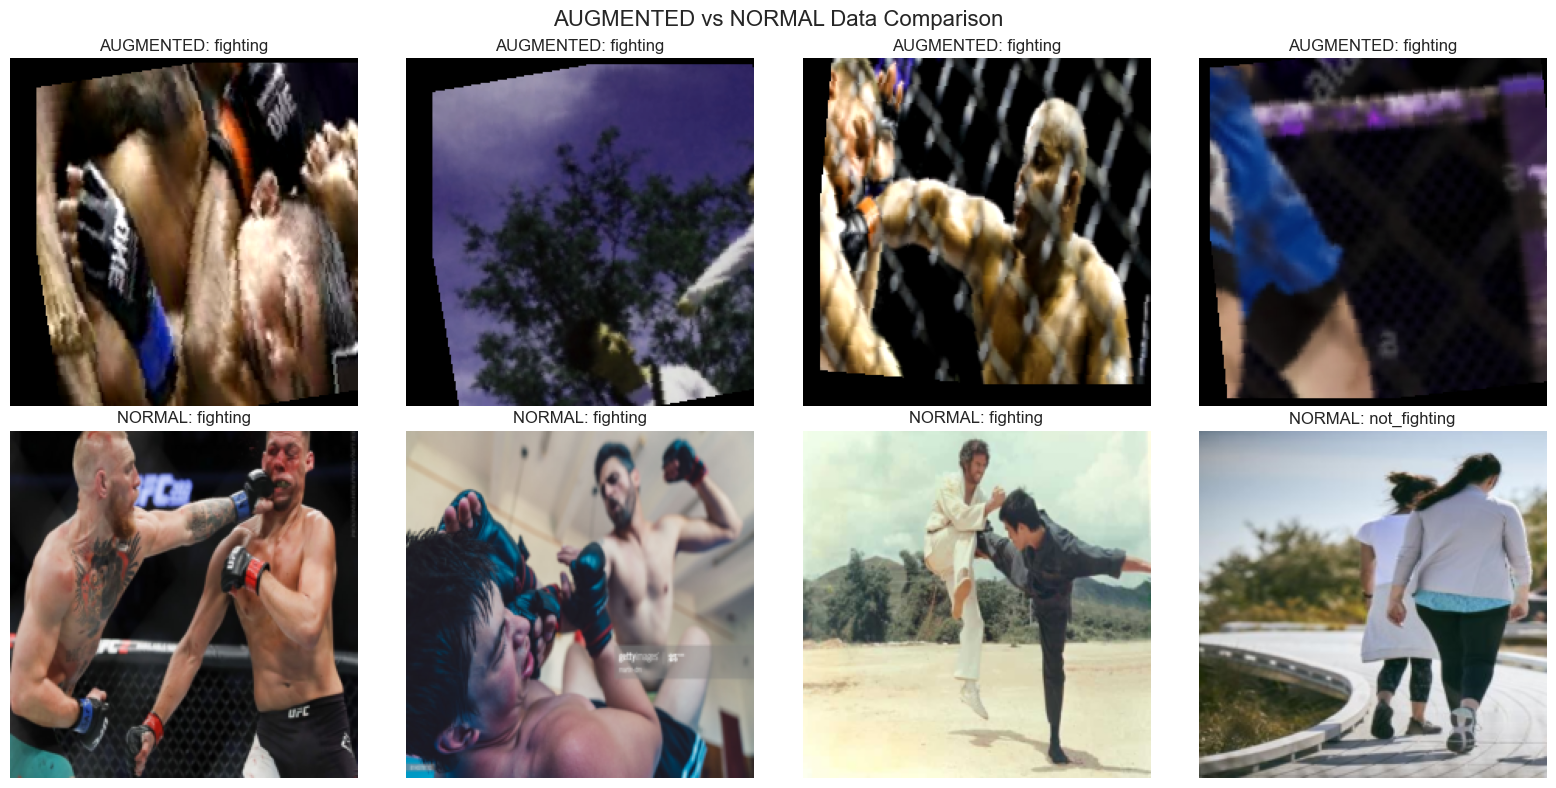

In [13]:
# Visualize augmented vs normal samples to see the difference
def visualize_augmented_vs_normal(train_dataset, val_dataset, num_samples=4):
    """Show difference between augmented training data and normal validation data"""
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 8))

    # Get same images from both datasets (they should have same images, different transforms)
    indices = random.sample(range(min(len(train_dataset), len(val_dataset))), num_samples)

    for i, idx in enumerate(indices):
        # Get augmented version
        aug_image, aug_label = train_dataset[idx]
        # Get normal version
        normal_image, normal_label = val_dataset[idx]

        # Denormalize for visualization
        mean = torch.tensor([0.485, 0.456, 0.406])
        std = torch.tensor([0.229, 0.224, 0.225])

        aug_image = aug_image * std.view(3, 1, 1) + mean.view(3, 1, 1)
        aug_image = torch.clamp(aug_image, 0, 1)

        normal_image = normal_image * std.view(3, 1, 1) + mean.view(3, 1, 1)
        normal_image = torch.clamp(normal_image, 0, 1)

        # Plot augmented (top row)
        axes[0, i].imshow(aug_image.permute(1, 2, 0).numpy())
        axes[0, i].set_title(f"AUGMENTED: {train_dataset.classes[aug_label]}")
        axes[0, i].axis('off')

        # Plot normal (bottom row)
        axes[1, i].imshow(normal_image.permute(1, 2, 0).numpy())
        axes[1, i].set_title(f"NORMAL: {val_dataset.classes[normal_label]}")
        axes[1, i].axis('off')

    plt.suptitle('AUGMENTED vs NORMAL Data Comparison', fontsize=16)
    plt.tight_layout()
    plt.show()

# Show the difference between augmented and normal data
visualize_augmented_vs_normal(train_dataset, val_dataset)

In [14]:
# Define ResNet50 model with transfer learning
class FightDetectionCNN(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(FightDetectionCNN, self).__init__()
        weights = torchvision.models.ResNet50_Weights.DEFAULT if pretrained else None
        self.backbone = torchvision.models.resnet50(weights=weights)
        num_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes),
        )
        self.freeze_backbone()

    def freeze_backbone(self):
        for p in self.backbone.parameters():
            p.requires_grad = False
        for p in self.backbone.fc.parameters():
            p.requires_grad = True

    def unfreeze_backbone(self):
        for p in self.backbone.parameters():
            p.requires_grad = True

    def forward(self, x):
        return self.backbone(x)


# Create model
cnn_model = FightDetectionCNN(num_classes=2, pretrained=True)
cnn_model = cnn_model.to(device)

print("CNN Model Created:")
print(f"Total parameters: {sum(p.numel() for p in cnn_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in cnn_model.parameters() if p.requires_grad):,}")

1.2%

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Syn/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100.0%


CNN Model Created:
Total parameters: 24,558,146
Trainable parameters: 1,050,114


In [15]:
# Training configuration and functions
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

        if batch_idx % 10 == 0:
            print(f'Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, '
                  f'Acc: {100. * correct / total:.2f}%')

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, targets in val_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc, all_targets, all_predictions

print("Training functions ready!")

Training functions ready!


In [16]:
# Phase 1: Train classifier only (frozen backbone)
print("="*60)
print("PHASE 1: Training classifier with frozen backbone")
print("="*60)

num_epochs_phase1 = 10
train_losses_p1 = []
train_accs_p1 = []
val_losses_p1 = []
val_accs_p1 = []

best_val_acc_p1 = 0.0
best_model_p1 = None

for epoch in range(num_epochs_phase1):
    print(f'\nEpoch {epoch+1}/{num_epochs_phase1}')
    print('-' * 30)

    # Training
    train_loss, train_acc = train_epoch(cnn_model, train_loader, criterion, optimizer, device)
    train_losses_p1.append(train_loss)
    train_accs_p1.append(train_acc)

    # Validation
    val_loss, val_acc, _, _ = validate_epoch(cnn_model, val_loader, criterion, device)
    val_losses_p1.append(val_loss)
    val_accs_p1.append(val_acc)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Save best model
    if val_acc > best_val_acc_p1:
        best_val_acc_p1 = val_acc
        best_model_p1 = copy.deepcopy(cnn_model.state_dict())
        print(f'New best validation accuracy: {val_acc:.2f}%')

    scheduler.step()

print(f"\nPhase 1 completed! Best validation accuracy: {best_val_acc_p1:.2f}%")

PHASE 1: Training classifier with frozen backbone

Epoch 1/10
------------------------------
Batch 0/9, Loss: 0.6856, Acc: 50.00%
Train Loss: 0.5851, Train Acc: 67.86%
Val Loss: 0.4970, Val Acc: 68.33%
New best validation accuracy: 68.33%

Epoch 2/10
------------------------------
Batch 0/9, Loss: 0.4778, Acc: 71.88%
Train Loss: 0.3653, Train Acc: 85.00%
Val Loss: 0.1239, Val Acc: 95.00%
New best validation accuracy: 95.00%

Epoch 3/10
------------------------------
Batch 0/9, Loss: 0.2690, Acc: 87.50%
Train Loss: 0.2380, Train Acc: 91.43%
Val Loss: 0.1817, Val Acc: 90.00%

Epoch 4/10
------------------------------
Batch 0/9, Loss: 0.3439, Acc: 81.25%
Train Loss: 0.2001, Train Acc: 91.43%
Val Loss: 0.0779, Val Acc: 98.33%
New best validation accuracy: 98.33%

Epoch 5/10
------------------------------
Batch 0/9, Loss: 0.1527, Acc: 90.62%
Train Loss: 0.1864, Train Acc: 91.43%
Val Loss: 0.1029, Val Acc: 91.67%

Epoch 6/10
------------------------------
Batch 0/9, Loss: 0.1529, Acc: 93.75%

In [17]:
# Phase 2: Fine-tune entire model
print("="*60)
print("PHASE 2: Fine-tuning entire model")
print("="*60)

# Load best model from phase 1
cnn_model.load_state_dict(best_model_p1)

# Unfreeze backbone for fine-tuning
cnn_model.unfreeze_backbone()

# Lower learning rate for fine-tuning
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

num_epochs_phase2 = 15
train_losses_p2 = []
train_accs_p2 = []
val_losses_p2 = []
val_accs_p2 = []

best_val_acc_p2 = best_val_acc_p1
best_model_p2 = None

for epoch in range(num_epochs_phase2):
    print(f'\nEpoch {epoch+1}/{num_epochs_phase2}')
    print('-' * 30)

    # Training
    train_loss, train_acc = train_epoch(cnn_model, train_loader, criterion, optimizer, device)
    train_losses_p2.append(train_loss)
    train_accs_p2.append(train_acc)

    # Validation
    val_loss, val_acc, _, _ = validate_epoch(cnn_model, val_loader, criterion, device)
    val_losses_p2.append(val_loss)
    val_accs_p2.append(val_acc)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Save best model
    if val_acc > best_val_acc_p2:
        best_val_acc_p2 = val_acc
        best_model_p2 = copy.deepcopy(cnn_model.state_dict())
        print(f'New best validation accuracy: {val_acc:.2f}%')

    scheduler.step()

print(f"\nPhase 2 completed! Best validation accuracy: {best_val_acc_p2:.2f}%")

# Save the best model
# Load best weights into the model, then save FULL model (so you can torch.load(...).eval())
if best_model_p2 is not None:
    cnn_model.load_state_dict(best_model_p2)

torch.save(cnn_model, 'best_fight_detection_cnn.pth')  # full model for easy inference
# Optional: also keep a pure state\_dict if needed
# torch.save(cnn_model.state_dict(), 'best_fight_detection_cnn_state.pth')

print("Best model saved as 'best_fight_detection_cnn.pth'")

PHASE 2: Fine-tuning entire model

Epoch 1/15
------------------------------
Batch 0/9, Loss: 0.2043, Acc: 93.75%
Train Loss: 0.1957, Train Acc: 92.50%
Val Loss: 0.0282, Val Acc: 100.00%

Epoch 2/15
------------------------------
Batch 0/9, Loss: 0.3597, Acc: 84.38%
Train Loss: 0.2079, Train Acc: 90.36%
Val Loss: 0.0260, Val Acc: 100.00%

Epoch 3/15
------------------------------
Batch 0/9, Loss: 0.2829, Acc: 93.75%
Train Loss: 0.1469, Train Acc: 94.64%
Val Loss: 0.0145, Val Acc: 100.00%

Epoch 4/15
------------------------------
Batch 0/9, Loss: 0.0804, Acc: 96.88%
Train Loss: 0.1228, Train Acc: 94.64%
Val Loss: 0.0197, Val Acc: 100.00%

Epoch 5/15
------------------------------
Batch 0/9, Loss: 0.0754, Acc: 96.88%
Train Loss: 0.0913, Train Acc: 97.14%
Val Loss: 0.0331, Val Acc: 98.33%

Epoch 6/15
------------------------------
Batch 0/9, Loss: 0.0648, Acc: 100.00%
Train Loss: 0.0816, Train Acc: 96.43%
Val Loss: 0.0264, Val Acc: 98.33%

Epoch 7/15
------------------------------
Batch 

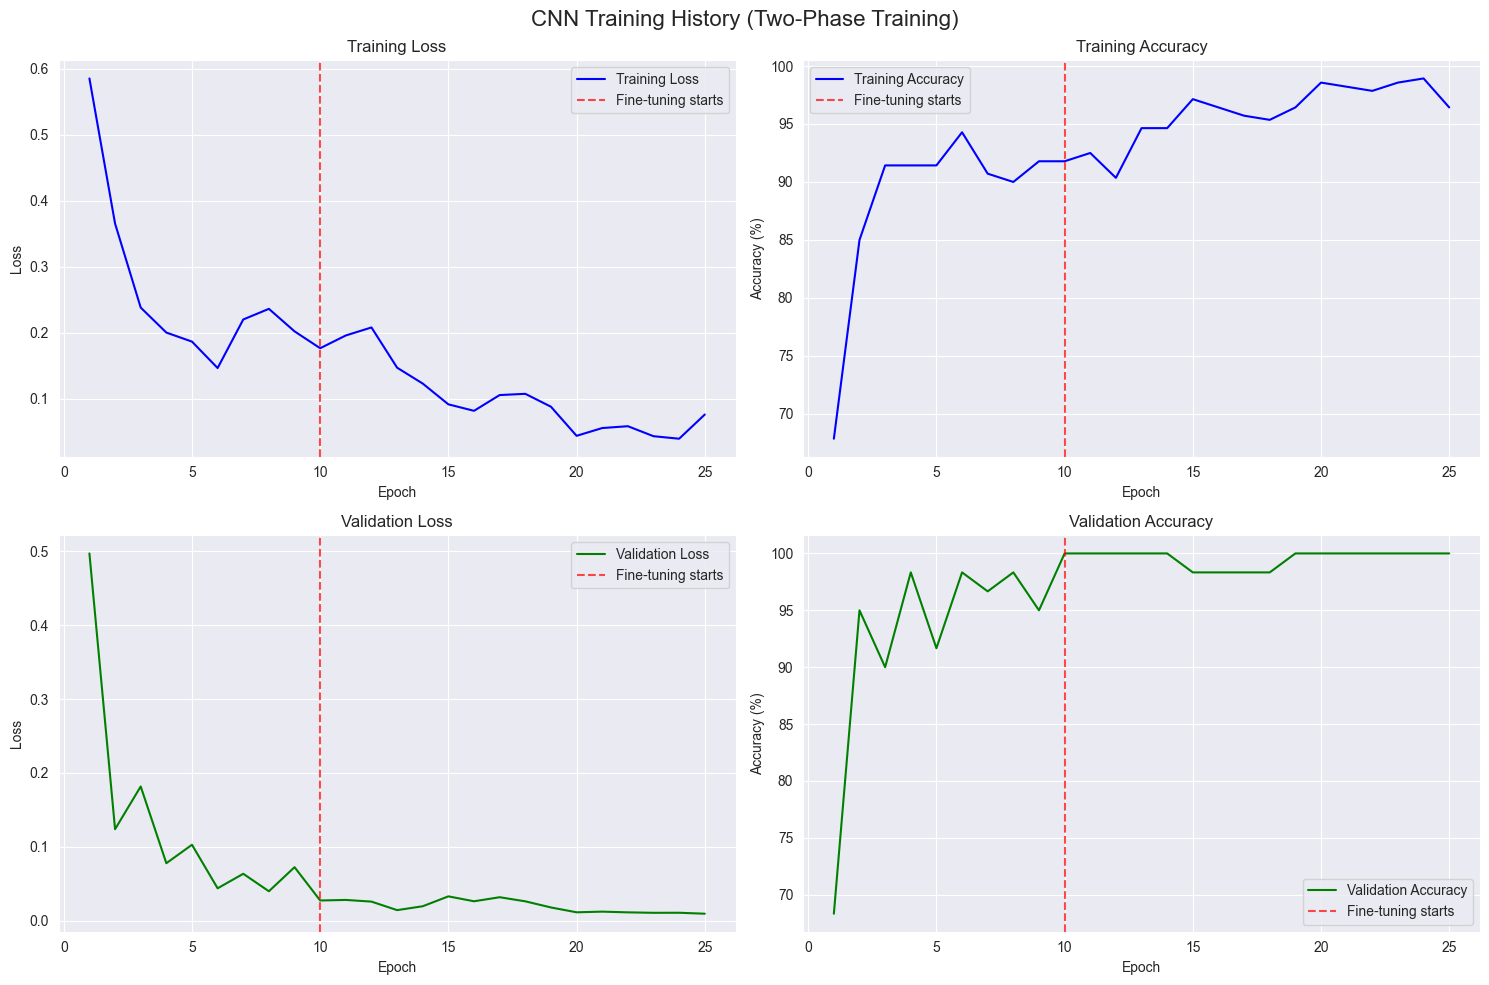

In [18]:
# Plot training history
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Combine both phases for plotting
all_train_losses = train_losses_p1 + train_losses_p2
all_train_accs = train_accs_p1 + train_accs_p2
all_val_losses = val_losses_p1 + val_losses_p2
all_val_accs = val_accs_p1 + val_accs_p2

epochs = range(1, len(all_train_losses) + 1)
phase1_end = len(train_losses_p1)

# Training Loss
ax1.plot(epochs, all_train_losses, 'b-', label='Training Loss')
ax1.axvline(x=phase1_end, color='r', linestyle='--', alpha=0.7, label='Fine-tuning starts')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Training Accuracy
ax2.plot(epochs, all_train_accs, 'b-', label='Training Accuracy')
ax2.axvline(x=phase1_end, color='r', linestyle='--', alpha=0.7, label='Fine-tuning starts')
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

# Validation Loss
ax3.plot(epochs, all_val_losses, 'g-', label='Validation Loss')
ax3.axvline(x=phase1_end, color='r', linestyle='--', alpha=0.7, label='Fine-tuning starts')
ax3.set_title('Validation Loss')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True)

# Validation Accuracy
ax4.plot(epochs, all_val_accs, 'g-', label='Validation Accuracy')
ax4.axvline(x=phase1_end, color='r', linestyle='--', alpha=0.7, label='Fine-tuning starts')
ax4.set_title('Validation Accuracy')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy (%)')
ax4.legend()
ax4.grid(True)

plt.suptitle('CNN Training History (Two-Phase Training)', fontsize=16)
plt.tight_layout()
plt.show()

FINAL CNN EVALUATION ON TEST SET
Info: No Phase-2 improvement; using best Phase-1 weights.
CNN Test Accuracy: 95.00%
CNN Test Loss: 0.0801

CNN Classification Report:
              precision    recall  f1-score   support

    fighting       0.94      0.97      0.95        30
not_fighting       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60


CNN Confusion Matrix:
[[29  1]
 [ 2 28]]


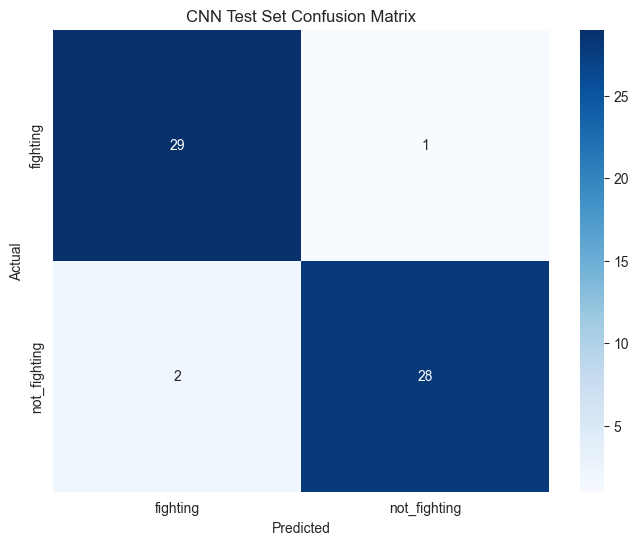


CNN Detailed Metrics:
True Positives: 28
True Negatives: 29
False Positives: 1
False Negatives: 2
Precision: 0.9655
Recall: 0.9333
F1-Score: 0.9492


In [19]:
# Final evaluation on test set (robust to None best_model_p2)

print("="*60)
print("FINAL CNN EVALUATION ON TEST SET")
print("="*60)

# Safely load best weights
if 'best_model_p2' in globals() and best_model_p2 is not None:
    cnn_model.load_state_dict(best_model_p2)
elif 'best_model_p1' in globals() and best_model_p1 is not None:
    print("Info: No Phase-2 improvement; using best Phase-1 weights.")
    cnn_model.load_state_dict(best_model_p1)
else:
    print("Warning: No saved best weights; evaluating current model parameters.")

# Test evaluation
test_loss, test_acc, test_targets, test_predictions = validate_epoch(
    cnn_model, test_loader, criterion, device
)

print(f"CNN Test Accuracy: {test_acc:.2f}%")
print(f"CNN Test Loss: {test_loss:.4f}")

# Detailed classification report
cnn_class_names = ['fighting', 'not_fighting']
print("\nCNN Classification Report:")
print(classification_report(test_targets, test_predictions, target_names=cnn_class_names))

# Confusion Matrix
cnn_conf_matrix = confusion_matrix(test_targets, test_predictions)
print("\nCNN Confusion Matrix:")
print(cnn_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cnn_conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=cnn_class_names,
    yticklabels=cnn_class_names
)
plt.title('CNN Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate detailed metrics
tn, fp, fn, tp = cnn_conf_matrix.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nCNN Detailed Metrics:")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [20]:
# Function to predict on new images with CNN
def predict_image_cnn(model, image_path, transform, device, class_names):
    """Predict fight/no-fight for a single image using CNN"""
    model.eval()

    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        predicted_class = torch.argmax(outputs, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    return {
        'predicted_class': class_names[predicted_class],
        'confidence': confidence,
        'probabilities': {
            class_names[0]: probabilities[0][0].item(),
            class_names[1]: probabilities[0][1].item()
        }
    }

# Test CNN predictions on sample images
sample_images = [
    './Images/fighting/32.jpg',
    './Images/not_fighting/best-friends-having-picnic-two-attractive-young-girls-dressed-casual-sitting-blanket-lawn-summer-chatting-57519752.jpg'
]

print("="*60)
print("CNN SAMPLE PREDICTIONS")
print("="*60)

for img_path in sample_images:
    if os.path.exists(img_path):
        cnn_result = predict_image_cnn(cnn_model, img_path, val_test_transforms, device, cnn_class_names)
        print(f"\nImage: {img_path}")
        print(f"CNN Predicted: {cnn_result['predicted_class']}")
        print(f"CNN Confidence: {cnn_result['confidence']:.4f}")
        print(f"CNN Probabilities: {cnn_result['probabilities']}")

CNN SAMPLE PREDICTIONS

Image: ./Images/fighting/32.jpg
CNN Predicted: fighting
CNN Confidence: 0.9902
CNN Probabilities: {'fighting': 0.990233302116394, 'not_fighting': 0.009766669012606144}

Image: ./Images/not_fighting/best-friends-having-picnic-two-attractive-young-girls-dressed-casual-sitting-blanket-lawn-summer-chatting-57519752.jpg
CNN Predicted: not_fighting
CNN Confidence: 0.9999
CNN Probabilities: {'fighting': 0.00011844908294733614, 'not_fighting': 0.9998815059661865}


Augment images to classify the final time
# python
import os
import cv2
import albumentations as A

# Configuration
source_dir = r'D:\Final\Violence-Detection-ML\Images'
dest_dir = r'D:\Final\Violence-Detection-ML\Images_augmented'
n_augmentations = 5  # number of augmented variants per source image
save_original_copy = True  # save original into augmented folder

# Augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(p=0.3),
    A.Flip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.15, rotate_limit=15, p=0.5),
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.4),
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0)),
        A.ISONoise(p=0.5)
    ], p=0.3),
    A.OneOf([
        A.MotionBlur(blur_limit=3),
        A.GaussianBlur(blur_limit=3),
    ], p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=20, val_shift_limit=15, p=0.4)
], p=1.0)

# Helper to ensure destination folders exist
os.makedirs(dest_dir, exist_ok=True)

# Supported image extensions
EXTS = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'}

for class_name in os.listdir(source_dir):
    class_src = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_src):
        continue
    class_dst = os.path.join(dest_dir, class_name)
    os.makedirs(class_dst, exist_ok=True)

    for fname in os.listdir(class_src):
        _, ext = os.path.splitext(fname)
        if ext.lower() not in EXTS:
            continue
        src_path = os.path.join(class_src, fname)
        img = cv2.imread(src_path)
        if img is None:
            continue

        base_name = os.path.splitext(fname)[0]

        # Optionally save original
        if save_original_copy:
            out_orig = os.path.join(class_dst, f"{base_name}_orig{ext}")
            cv2.imwrite(out_orig, img)

        # Generate augmentations
        for i in range(n_augmentations):
            try:
                augmented = transform(image=img)['image']
                out_name = f"{base_name}_aug{i+1}{ext}"
                out_path = os.path.join(class_dst, out_name)
                cv2.imwrite(out_path, augmented)
            except Exception:
                # skip problematic images
                continue

print("Augmentation finished. Augmented dataset at:", dest_dir)

In [22]:
source_dir = r'D:\Final\Violence-Detection-ML\Images'
dest_dir = r'D:\Final\Violence-Detection-ML\Images_augmented'
n_aug = 5

os.makedirs(dest_dir, exist_ok=True)

def augment(img):
    h, w = img.shape[:2]
    if random.random() < 0.5:
        img = cv2.flip(img, 1)
    angle = random.uniform(-15, 15)
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    img = cv2.resize(img, (224, 224))
    return img

for cls in ['fighting', 'not_fighting']:
    src = os.path.join(source_dir, cls)
    dst = os.path.join(dest_dir, cls)
    os.makedirs(dst, exist_ok=True)

    for fn in os.listdir(src):
        if not fn.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img = cv2.imread(os.path.join(src, fn))
        if img is None:
            continue

        base = os.path.splitext(fn)[0]
        for i in range(n_aug):
            out = augment(img.copy())
            cv2.imwrite(os.path.join(dst, f"{base}_aug{i}.jpg"), out)

print("Done. Augmented images saved to:", dest_dir)

Done. Augmented images saved to: D:\Final\Violence-Detection-ML\Images_augmented


In [27]:
final_check = r'D:\Final\Violence-Detection-ML\Images_augmented'

for cls in ['fighting', 'not_fighting']:
    cls_path = os.path.join(final_check, cls)
    if not os.path.exists(cls_path):
        print(f"Folder not found: {cls_path}")
        continue

    print(f"\n{'='*60}")
    print(f"Checking {cls.upper()} folder")
    print(f"{'='*60}")

    images = [os.path.join(cls_path, f) for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Total images: {len(images)}")

    correct = 0
    total = 0

    for img_path in images:
        cnn_result = predict_image_cnn(cnn_model, img_path, val_test_transforms, device, cnn_class_names)

        predicted = cnn_result['predicted_class']
        is_correct = predicted == cls

        if is_correct:
            correct += 1
        total += 1

        print(f"\nImage: {os.path.basename(img_path)}")
        print(f"CNN Predicted: {predicted}")
        print(f"CNN Confidence: {cnn_result['confidence']:.4f}")
        print(f"CNN Probabilities: {cnn_result['probabilities']}")
        print(f"Actual: {cls} {'✓' if is_correct else '✗'}")

    accuracy = (correct / total * 100) if total > 0 else 0
    print(f"\n{'='*60}")
    print(f"Accuracy for {cls}: {correct}/{total} ({accuracy:.2f}%)")
    print(f"{'='*60}")

print("\nDone checking all images.")



Checking FIGHTING folder
Total images: 1000

Image: 1 (2)_aug0.jpg
CNN Predicted: fighting
CNN Confidence: 1.0000
CNN Probabilities: {'fighting': 0.9999953508377075, 'not_fighting': 4.590306161844637e-06}
Actual: fighting ✓

Image: 1 (2)_aug1.jpg
CNN Predicted: fighting
CNN Confidence: 0.9999
CNN Probabilities: {'fighting': 0.9999488592147827, 'not_fighting': 5.110839265398681e-05}
Actual: fighting ✓

Image: 1 (2)_aug2.jpg
CNN Predicted: fighting
CNN Confidence: 1.0000
CNN Probabilities: {'fighting': 0.9999517202377319, 'not_fighting': 4.8328962293453515e-05}
Actual: fighting ✓

Image: 1 (2)_aug3.jpg
CNN Predicted: fighting
CNN Confidence: 0.9999
CNN Probabilities: {'fighting': 0.9998847246170044, 'not_fighting': 0.00011523954890435562}
Actual: fighting ✓

Image: 1 (2)_aug4.jpg
CNN Predicted: fighting
CNN Confidence: 1.0000
CNN Probabilities: {'fighting': 0.9999978542327881, 'not_fighting': 2.2035719666746445e-06}
Actual: fighting ✓

Image: 105 (2)_aug0.jpg
CNN Predicted: fighting
CNN

### Compare YOLO vs CNN Results

In [28]:
# Compare YOLO detect_fight vs CNN predictions on sample images
print("="*80)
print("COMPARISON: YOLO detect_fight vs CNN predictions")
print("="*80)

comparison_results = []

for img_path in sample_images:
    if os.path.exists(img_path):
        print(f"\n{'='*50}")
        print(f"Image: {img_path}")
        print(f"{'='*50}")

        # YOLO detection
        try:
            yolo_fight, yolo_info = detect_fight(img_path, model)  # Your YOLO model
            print(f"\nYOLO Method:")
            print(f"  Predicted: {'Fighting' if yolo_fight else 'Not Fighting'}")
            print(f"  People detected: {yolo_info.get('person_count', 0)}")
            print(f"  Max overlap: {yolo_info.get('max_overall_overlap', 0):.3f}")
            print(f"  Min distance: {yolo_info.get('min_distance', float('inf')):.1f}")
        except Exception as e:
            print(f"\nYOLO Method: Error - {e}")
            yolo_fight = None

        # CNN prediction
        try:
            cnn_result = predict_image_cnn(cnn_model, img_path, val_test_transforms, device, cnn_class_names)
            cnn_fight = cnn_result['predicted_class'] == 'fighting'
            print(f"\nCNN Method:")
            print(f"  Predicted: {cnn_result['predicted_class'].title()}")
            print(f"  Confidence: {cnn_result['confidence']:.4f}")
            print(f"  Fighting probability: {cnn_result['probabilities']['fighting']:.4f}")
        except Exception as e:
            print(f"\nCNN Method: Error - {e}")
            cnn_fight = None

        # Compare results
        if yolo_fight is not None and cnn_fight is not None:
            agreement = yolo_fight == cnn_fight
            print(f"\nAgreement: {'✓ AGREE' if agreement else '✗ DISAGREE'}")

            comparison_results.append({
                'image': img_path,
                'yolo_prediction': yolo_fight,
                'cnn_prediction': cnn_fight,
                'agreement': agreement
            })

print(f"\n{'='*80}")
print("SUMMARY COMPARISON")
print(f"{'='*80}")
if comparison_results:
    agreements = sum(1 for r in comparison_results if r['agreement'])
    total = len(comparison_results)
    print(f"Agreement rate: {agreements}/{total} ({100*agreements/total:.1f}%)")

    for result in comparison_results:
        status = "✓" if result['agreement'] else "✗"
        print(f"{status} {result['image']}: YOLO={result['yolo_prediction']}, CNN={result['cnn_prediction']}")
else:
    print("No valid comparisons could be made.")


COMPARISON: YOLO detect_fight vs CNN predictions

Image: ./Images/fighting/32.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\fighting\32.jpg: 544x640 2 persons, 58.7ms
Speed: 11.3ms preprocess, 58.7ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

YOLO Method:
  Predicted: Fighting
  People detected: 2
  Max overlap: 0.319
  Min distance: 98.5

CNN Method:
  Predicted: Fighting
  Confidence: 0.9902
  Fighting probability: 0.9902

Agreement: ✓ AGREE

Image: ./Images/not_fighting/best-friends-having-picnic-two-attractive-young-girls-dressed-casual-sitting-blanket-lawn-summer-chatting-57519752.jpg

image 1/1 D:\Final\Violence-Detection-ML\Images\not_fighting\best-friends-having-picnic-two-attractive-young-girls-dressed-casual-sitting-blanket-lawn-summer-chatting-57519752.jpg: 448x640 2 persons, 1 orange, 58.2ms
Speed: 4.5ms preprocess, 58.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

YOLO Method:
  Predicted: Fighting
  People detected: 2
 

### Additional Models for Comparison: Basic CNN and ANN

In [29]:
# Transformations for CNN
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # normalize to [-1, 1]
])

dataset = datasets.ImageFolder("./Processed_Images", transform=transform)

# Split into train/val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [31]:
# CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # First Layer
            nn.Conv2d(3, 32, 3, padding=1),  # (128,128,3) -> (32,128,128)
            nn.ReLU(),
            nn.MaxPool2d(2,2),               # -> (32,64,64)
            # Second Layer
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),               # -> (64,32,32)
            # Third Layer
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)                # -> (128,16,16)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*16*16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [32]:
# ANN model
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*128*128, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    model = model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        train_loss, correct = 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = (outputs > 0.5).int()
            correct += (preds == labels.int()).sum().item()

        acc = correct / len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                preds = (outputs > 0.5).int()
                val_correct += (preds == labels.int()).sum().item()
        val_acc = val_correct / len(val_loader.dataset)

        # Save history
        history["train_loss"].append(train_loss / len(train_loader))
        history["train_acc"].append(acc)
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {acc:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}")
    return model, history


In [34]:
simple_cnn_model = SimpleCNN()
simple_cnn_model, cnn_history = train_model(simple_cnn_model, train_loader, val_loader, epochs=10)
torch.save(simple_cnn_model.state_dict(), "cnn_best.pth")

simple_ann_model = SimpleANN()
simple_ann_model, ann_history = train_model(simple_ann_model, train_loader, val_loader, epochs=10)
torch.save(simple_ann_model.state_dict(), "ann_best.pth")

Epoch 1/10 - Train Loss: 0.6004, Train Acc: 0.6750, Val Loss: 0.6104, Val Acc: 0.7500
Epoch 2/10 - Train Loss: 0.4541, Train Acc: 0.8313, Val Loss: 0.6269, Val Acc: 0.6500
Epoch 3/10 - Train Loss: 0.4242, Train Acc: 0.8344, Val Loss: 0.5376, Val Acc: 0.7375
Epoch 4/10 - Train Loss: 0.4006, Train Acc: 0.8344, Val Loss: 0.5032, Val Acc: 0.7250
Epoch 5/10 - Train Loss: 0.3458, Train Acc: 0.8750, Val Loss: 0.5178, Val Acc: 0.7250
Epoch 6/10 - Train Loss: 0.3062, Train Acc: 0.8750, Val Loss: 0.4158, Val Acc: 0.7375
Epoch 7/10 - Train Loss: 0.2644, Train Acc: 0.9219, Val Loss: 0.6943, Val Acc: 0.6875
Epoch 8/10 - Train Loss: 0.1968, Train Acc: 0.9156, Val Loss: 0.3370, Val Acc: 0.8250
Epoch 9/10 - Train Loss: 0.1815, Train Acc: 0.9375, Val Loss: 0.3697, Val Acc: 0.8125
Epoch 10/10 - Train Loss: 0.1684, Train Acc: 0.9187, Val Loss: 0.4472, Val Acc: 0.7750
Epoch 1/10 - Train Loss: 4.0960, Train Acc: 0.7156, Val Loss: 7.1489, Val Acc: 0.7000
Epoch 2/10 - Train Loss: 5.1898, Train Acc: 0.8688, V

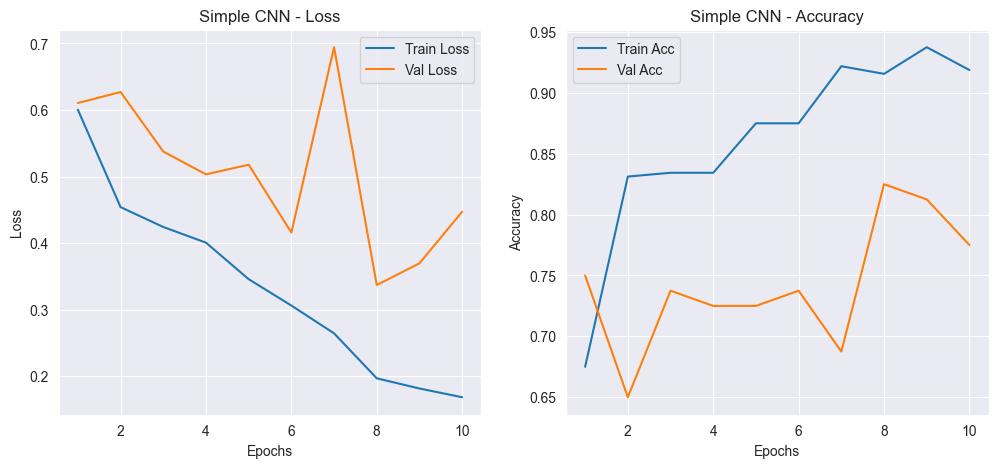

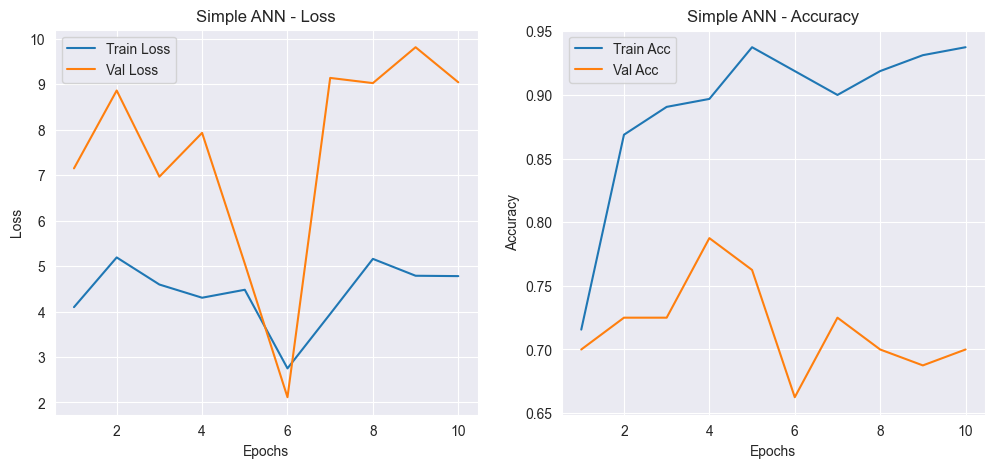

In [35]:
def plot_history(history, title="Model Training"):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, history["train_acc"], label="Train Acc")
    plt.plot(epochs, history["val_acc"], label="Val Acc")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs"); plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

plot_history(cnn_history, "Simple CNN")
plot_history(ann_history, "Simple ANN")



Simple CNN Classification Report:

              precision    recall  f1-score   support

   Non-Fight       0.80      0.72      0.76        39
       Fight       0.76      0.83      0.79        41

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



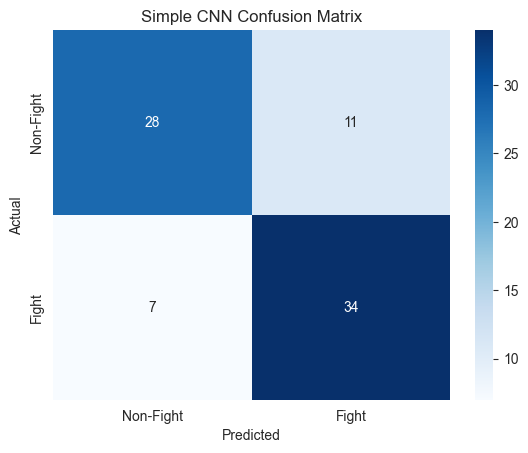


Simple ANN Classification Report:

              precision    recall  f1-score   support

   Non-Fight       0.67      0.74      0.71        39
       Fight       0.73      0.66      0.69        41

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



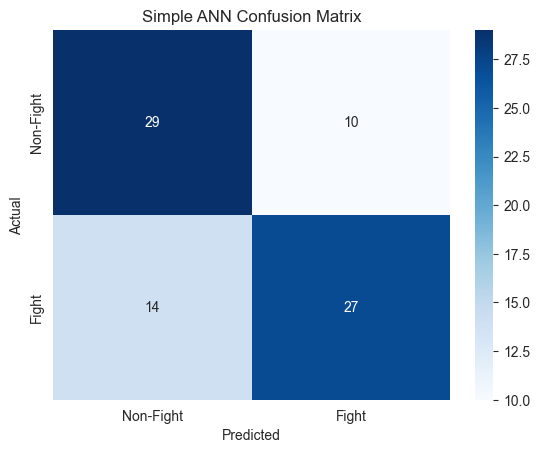

In [36]:
def evaluate_model(model, val_loader, name="Model"):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = (outputs > 0.5).int().cpu().numpy()
            y_pred.extend(preds.flatten())
            y_true.extend(labels.numpy())

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=["Non-Fight", "Fight"]))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fight", "Fight"], yticklabels=["Non-Fight", "Fight"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(simple_cnn_model, val_loader, "Simple CNN")
evaluate_model(simple_ann_model, val_loader, "Simple ANN")

### Frequency analysis

Creating frequency domain visualizations...
Saved: frequency_fighting.png
Saved: frequency_not_fighting.png


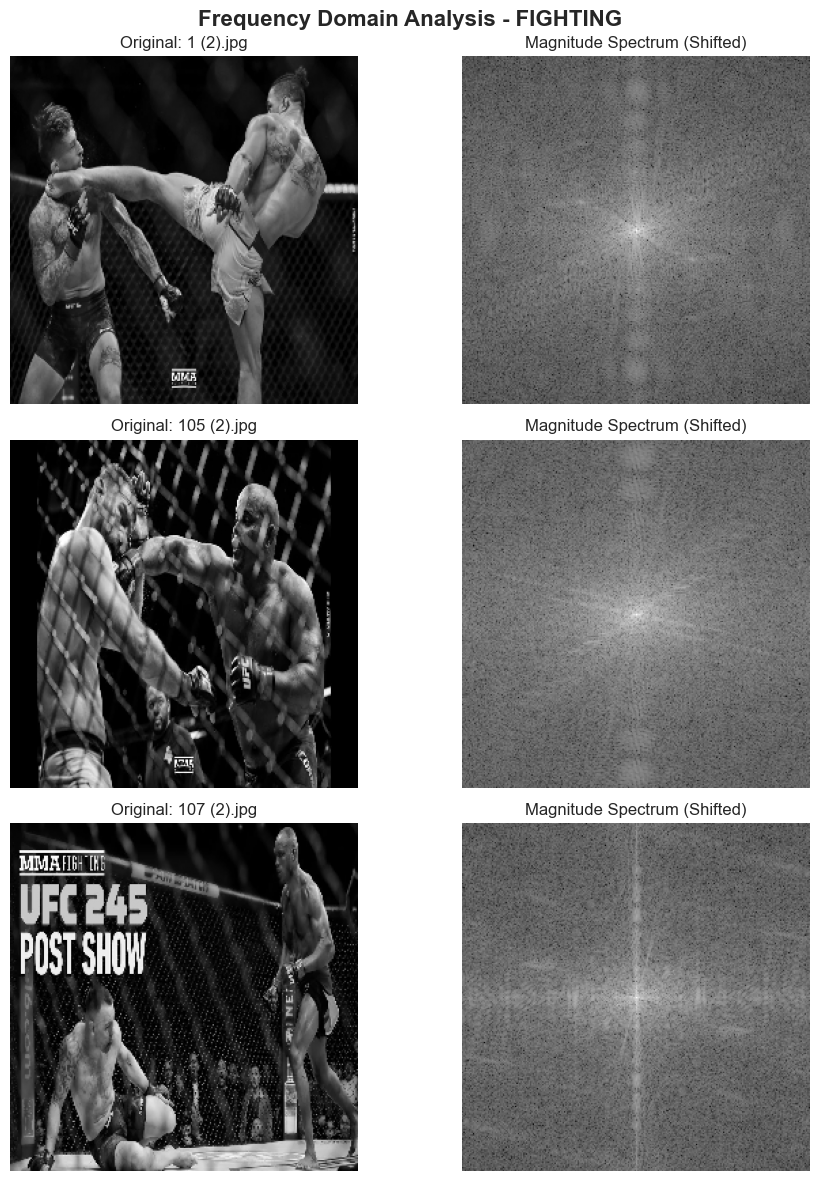

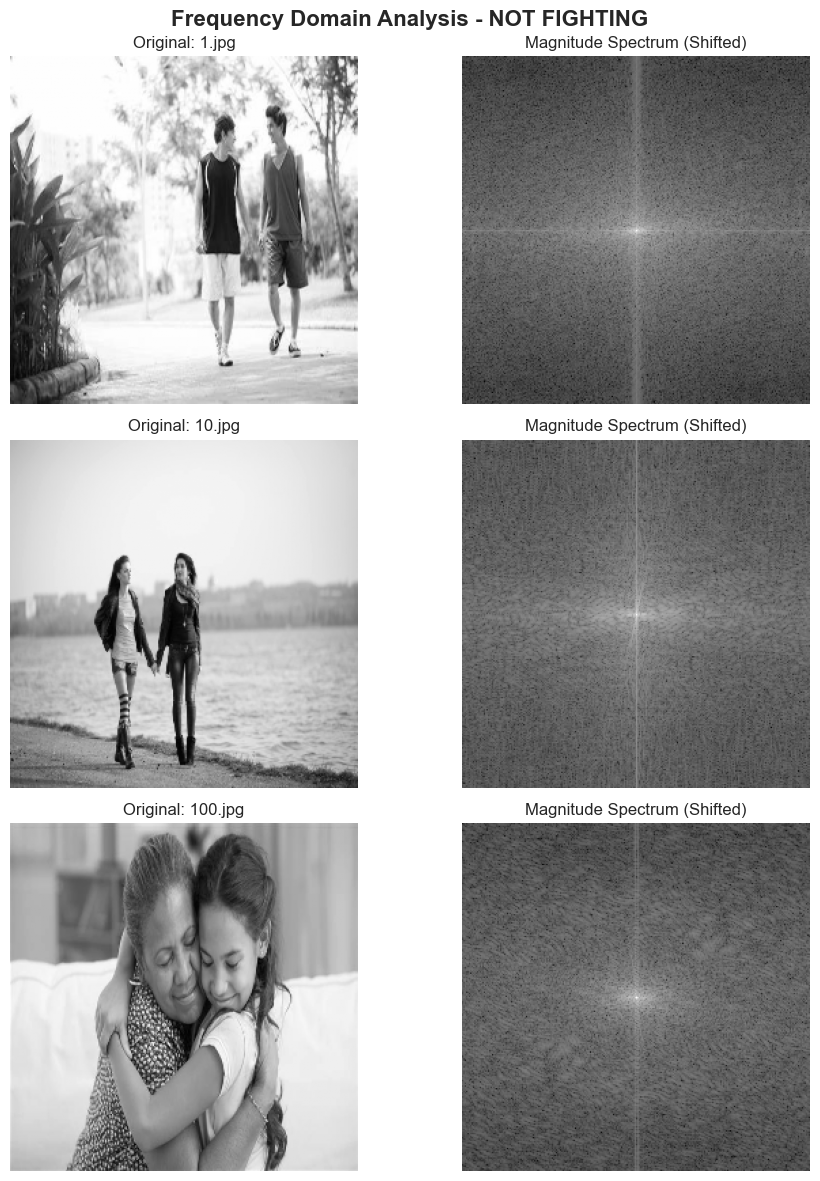

In [39]:
# Paths
images_dir = r'D:\Final\Violence-Detection-ML\Images'
fighting_dir = os.path.join(images_dir, 'fighting')
not_fighting_dir = os.path.join(images_dir, 'not_fighting')

def get_frequency_spectrum(img_path):
    """Compute frequency spectrum with shifted zero frequency"""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None, None

    # Resize for consistency
    img = cv2.resize(img, (256, 256))

    # Apply FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # Shift zero frequency to center

    # Compute magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    return img, magnitude_spectrum

def plot_frequency_comparison(class_name, img_paths, n_samples=3):
    """Plot original images and their frequency spectrums"""
    fig, axes = plt.subplots(n_samples, 2, figsize=(10, 4*n_samples))
    fig.suptitle(f'Frequency Domain Analysis - {class_name.upper()}', fontsize=16, fontweight='bold')

    for i, img_path in enumerate(img_paths[:n_samples]):
        img, spectrum = get_frequency_spectrum(img_path)
        if img is None:
            continue

        # Original image
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f'Original: {os.path.basename(img_path)}')
        axes[i, 0].axis('off')

        # Frequency spectrum
        axes[i, 1].imshow(spectrum, cmap='gray')
        axes[i, 1].set_title('Magnitude Spectrum (Shifted)')
        axes[i, 1].axis('off')

    plt.tight_layout()
    return fig

# Get sample images
fighting_images = [os.path.join(fighting_dir, f) for f in os.listdir(fighting_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:3]

not_fighting_images = [os.path.join(not_fighting_dir, f) for f in os.listdir(not_fighting_dir)
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:3]

# Create comparison plots
print("Creating frequency domain visualizations...")

# Fighting images
fig1 = plot_frequency_comparison('Fighting', fighting_images)
plt.savefig('frequency_fighting.png', dpi=150, bbox_inches='tight')
print("Saved: frequency_fighting.png")

# Not fighting images
fig2 = plot_frequency_comparison('Not Fighting', not_fighting_images)
plt.savefig('frequency_not_fighting.png', dpi=150, bbox_inches='tight')
print("Saved: frequency_not_fighting.png")

plt.show()

### Time frequency analysis

Creating time-frequency visualizations...
Saved: timefreq_fighting.png
Saved: timefreq_not_fighting.png
Saved: timefreq_comparison.png


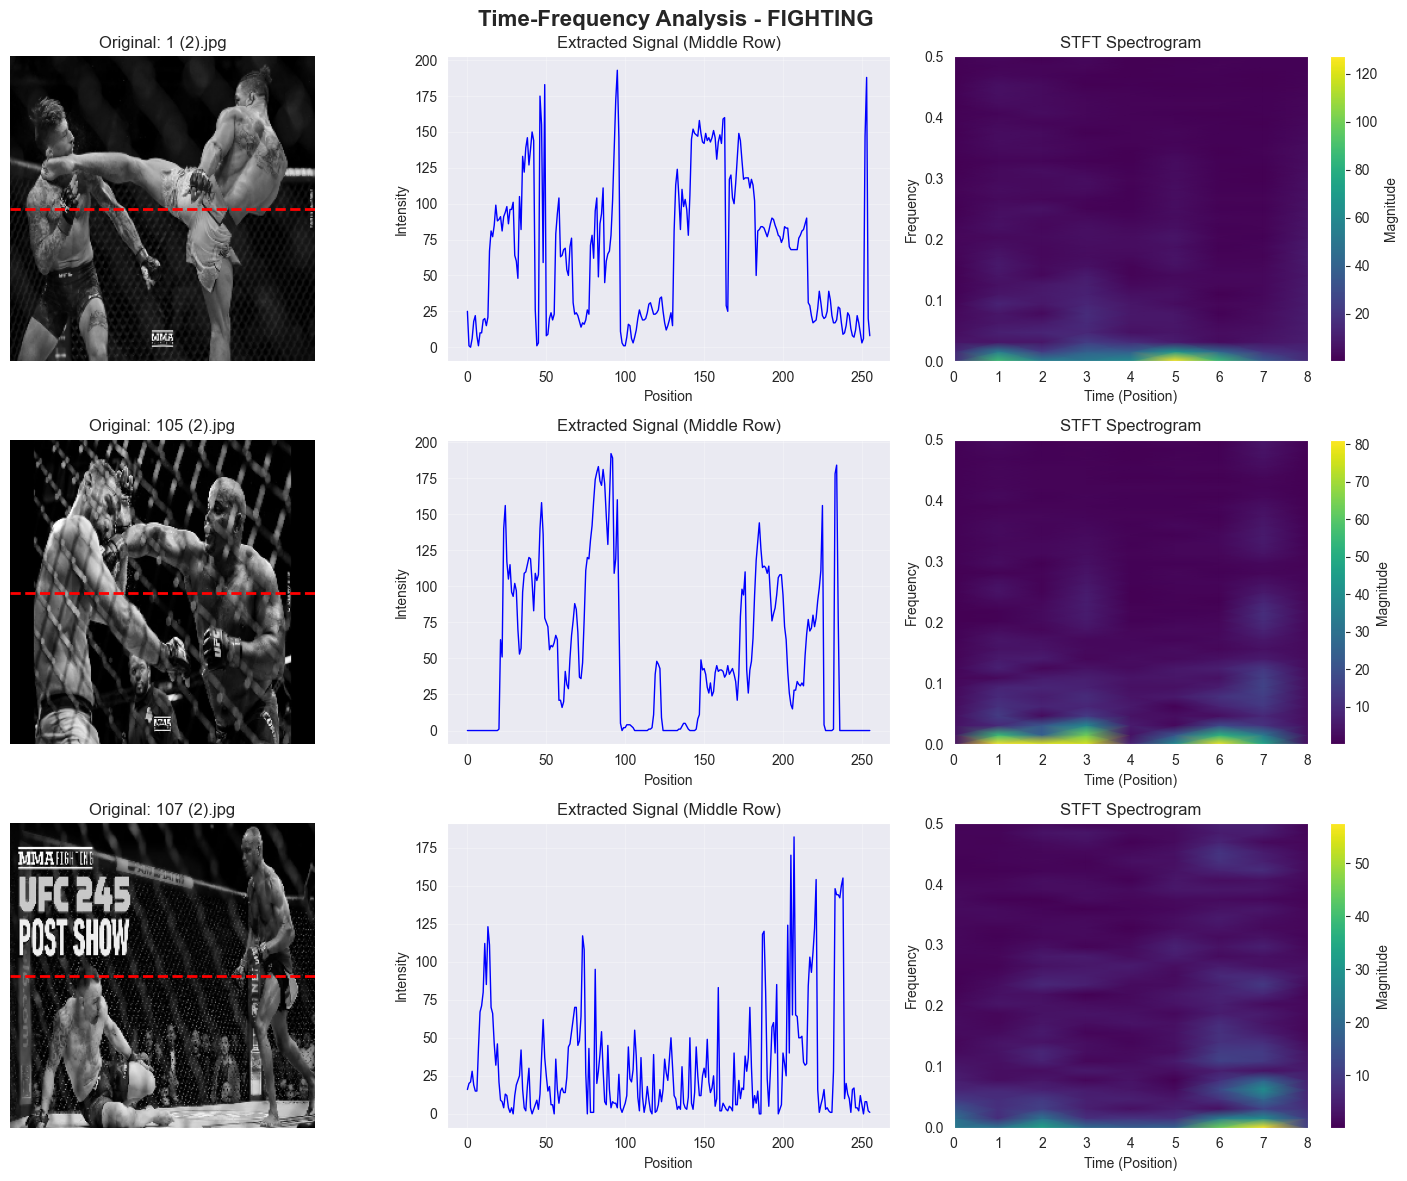

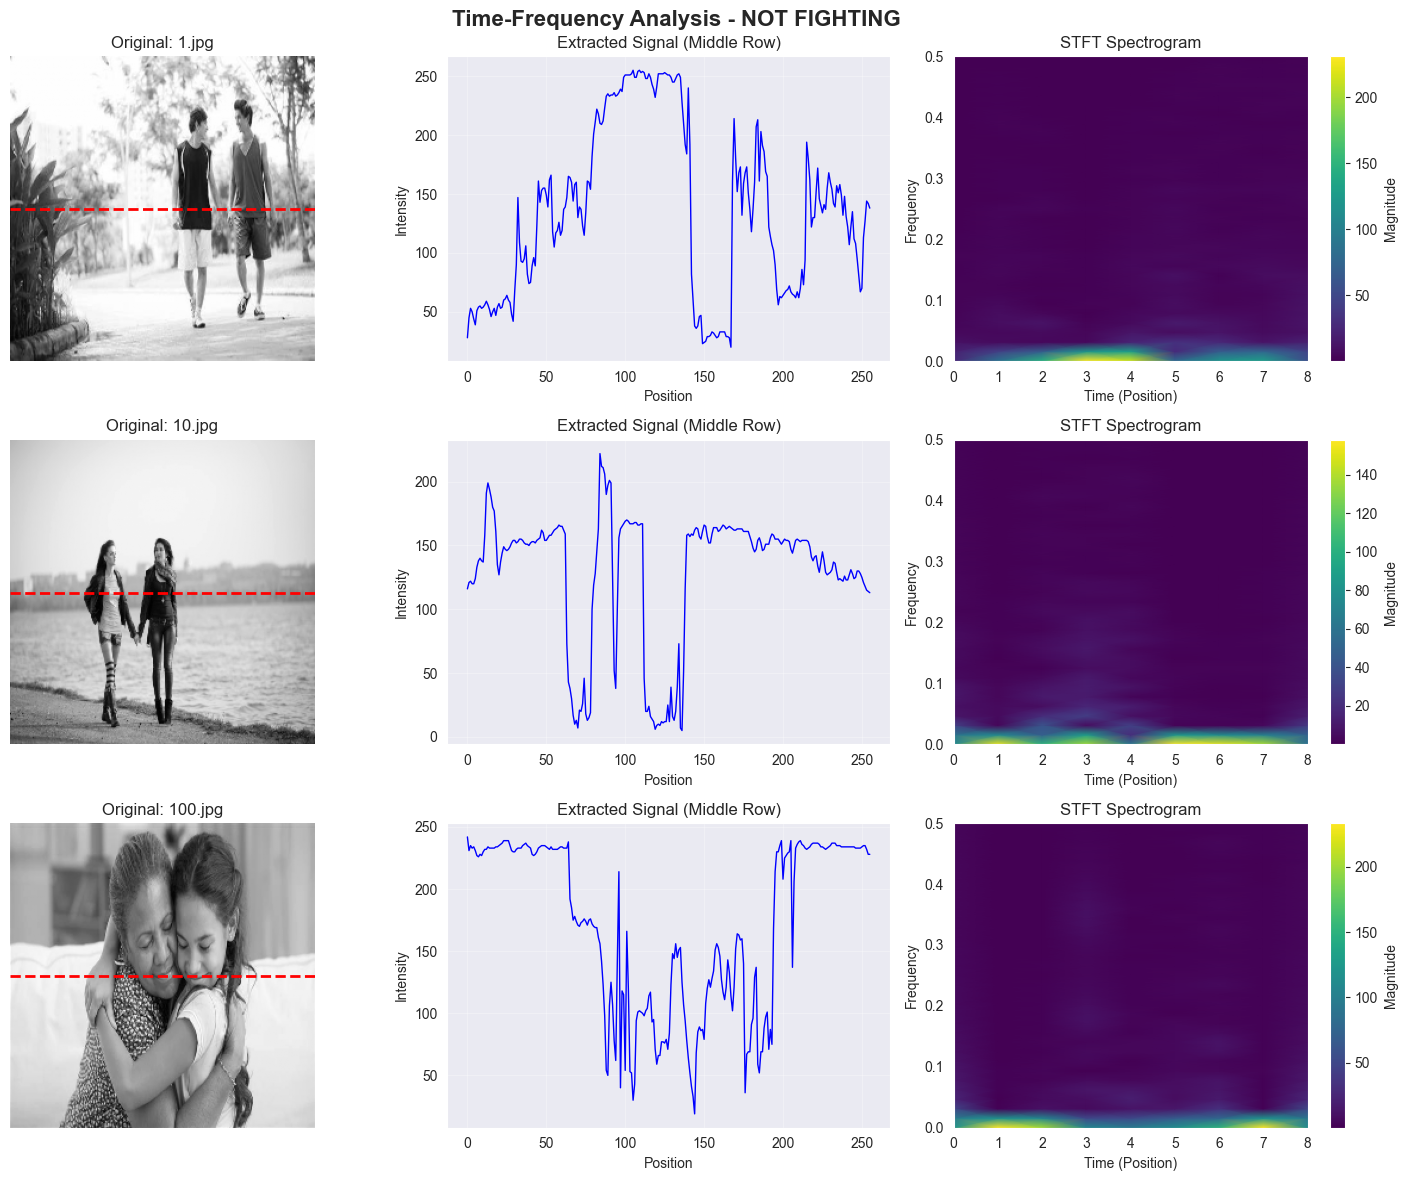

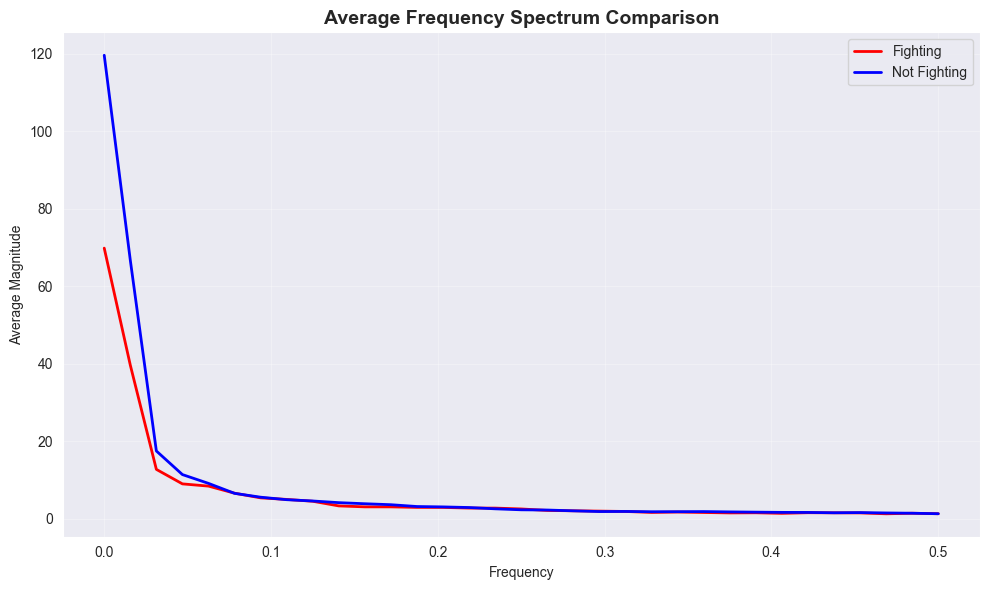

In [42]:
# Paths
images_dir = r'D:\Final\Violence-Detection-ML\Images'
fighting_dir = os.path.join(images_dir, 'fighting')
not_fighting_dir = os.path.join(images_dir, 'not_fighting')

def compute_stft_for_image(img_path):
    """Compute STFT on image rows to analyze time-frequency characteristics"""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None, None, None, None

    # Resize for consistency
    img = cv2.resize(img, (256, 256))

    # Take middle row as 1D signal (simulates temporal progression)
    signal_1d = img[128, :]

    # Compute STFT
    f, t, Zxx = signal.stft(signal_1d, fs=1.0, nperseg=64, noverlap=32)

    return img, signal_1d, f, Zxx

def plot_time_frequency_analysis(class_name, img_paths, n_samples=3):
    """Plot time-frequency analysis using spectrogram"""
    fig, axes = plt.subplots(n_samples, 3, figsize=(15, 4*n_samples))
    fig.suptitle(f'Time-Frequency Analysis - {class_name.upper()}', fontsize=16, fontweight='bold')

    for i, img_path in enumerate(img_paths[:n_samples]):
        img, signal_1d, f, Zxx = compute_stft_for_image(img_path)
        if img is None:
            continue

        # Original image with line showing extracted signal
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].axhline(y=128, color='r', linestyle='--', linewidth=2)
        axes[i, 0].set_title(f'Original: {os.path.basename(img_path)}')
        axes[i, 0].axis('off')

        # 1D signal
        axes[i, 1].plot(signal_1d, color='blue', linewidth=1)
        axes[i, 1].set_title('Extracted Signal (Middle Row)')
        axes[i, 1].set_xlabel('Position')
        axes[i, 1].set_ylabel('Intensity')
        axes[i, 1].grid(True, alpha=0.3)

        # STFT Spectrogram (Time-Frequency)
        magnitude = np.abs(Zxx)
        im = axes[i, 2].pcolormesh(np.arange(magnitude.shape[1]), f, magnitude,
                                     shading='gouraud', cmap='viridis')
        axes[i, 2].set_title('STFT Spectrogram')
        axes[i, 2].set_xlabel('Time (Position)')
        axes[i, 2].set_ylabel('Frequency')
        plt.colorbar(im, ax=axes[i, 2], label='Magnitude')

    plt.tight_layout()
    return fig

def plot_average_spectrum_comparison(fighting_imgs, not_fighting_imgs, n_samples=5):
    """Compare average frequency content between classes"""
    def get_avg_spectrum(img_paths):
        spectrums = []
        for img_path in img_paths[:n_samples]:
            _, signal_1d, f, Zxx = compute_stft_for_image(img_path)
            if Zxx is not None:
                magnitude = np.abs(Zxx)
                avg_magnitude = np.mean(magnitude, axis=1)
                spectrums.append(avg_magnitude)
        return f, np.mean(spectrums, axis=0) if spectrums else None

    f_fight, avg_fight = get_avg_spectrum(fighting_imgs)
    f_notfight, avg_notfight = get_avg_spectrum(not_fighting_imgs)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(f_fight, avg_fight, label='Fighting', linewidth=2, color='red')
    ax.plot(f_notfight, avg_notfight, label='Not Fighting', linewidth=2, color='blue')
    ax.set_title('Average Frequency Spectrum Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Average Magnitude')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

# Get sample images
fighting_images = [os.path.join(fighting_dir, f) for f in os.listdir(fighting_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]

not_fighting_images = [os.path.join(not_fighting_dir, f) for f in os.listdir(not_fighting_dir)
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]

# Create time-frequency analysis plots
print("Creating time-frequency visualizations...")

# Fighting images
fig1 = plot_time_frequency_analysis('Fighting', fighting_images, n_samples=3)
plt.savefig('timefreq_fighting.png', dpi=150, bbox_inches='tight')
print("Saved: timefreq_fighting.png")

# Not fighting images
fig2 = plot_time_frequency_analysis('Not Fighting', not_fighting_images, n_samples=3)
plt.savefig('timefreq_not_fighting.png', dpi=150, bbox_inches='tight')
print("Saved: timefreq_not_fighting.png")

# Comparison plot
fig3 = plot_average_spectrum_comparison(fighting_images, not_fighting_images)
plt.savefig('timefreq_comparison.png', dpi=150, bbox_inches='tight')
print("Saved: timefreq_comparison.png")

plt.show()

In [1]:
# Loop over every images to get the STFT spectrogram
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
images_folder = r'D:\Final\Violence-Detection-ML\Images'
output_folder = r'D:\Final\Violence-Detection-ML\Frequency_Spectrums'

# Function to compute and plot frequency spectrum
def plot_frequency_spectrum(image_path, output_path):
    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load: {image_path}")
        return False

    # Apply FFT
    f_transform = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

    # Save only the frequency spectrum
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Frequency Spectrum')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight')
    plt.close()

    return True

# Loop through fighting and not_fighting folders
for category in ['fighting', 'not_fighting']:
    category_path = os.path.join(images_folder, category)
    output_category_path = os.path.join(output_folder, category)

    # Create output category folder
    os.makedirs(output_category_path, exist_ok=True)

    if not os.path.exists(category_path):
        print(f"Category folder not found: {category_path}")
        continue

    # Process each image
    image_count = 0
    for img_file in os.listdir(category_path):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img_path = os.path.join(category_path, img_file)
            # Keep same filename for frequency spectrum
            output_path = os.path.join(output_category_path, img_file)

            if plot_frequency_spectrum(img_path, output_path):
                image_count += 1
                print(f"Processed [{category}]: {img_file}")

    print(f"Completed {category}: {image_count} images processed\n")

print("All frequency spectrum generation complete!")
print(f"Output saved to: {output_folder}")

Processed [fighting]: 1 (2).jpg
Processed [fighting]: 105 (2).jpg
Processed [fighting]: 107 (2).jpg
Processed [fighting]: 107.jpg
Processed [fighting]: 108 (2).jpg
Processed [fighting]: 108.jpg
Processed [fighting]: 109 (2).jpg
Processed [fighting]: 110 (2).jpg
Processed [fighting]: 111 (2).jpg
Processed [fighting]: 112.jpg
Processed [fighting]: 113.jpg
Processed [fighting]: 116 (3).jpg
Processed [fighting]: 116.jpg
Processed [fighting]: 117 (2).jpg
Processed [fighting]: 121.jpg
Processed [fighting]: 122 (3).jpg
Processed [fighting]: 123.jpg
Processed [fighting]: 124.jpg
Processed [fighting]: 126.jpg
Processed [fighting]: 128 (2).jpg
Processed [fighting]: 128.jpg
Processed [fighting]: 13 (2).jpg
Processed [fighting]: 131 (2).jpg
Processed [fighting]: 138.jpg
Processed [fighting]: 139 (3).jpg
Processed [fighting]: 139.jpg
Processed [fighting]: 141.jpg
Processed [fighting]: 142.jpg
Processed [fighting]: 147 (2).jpg
Processed [fighting]: 149 (3).jpg
Processed [fighting]: 149.jpg
Processed

In [1]:
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
from torchvision.models import resnet50, ResNet50_Weights
import json
from datetime import datetime
import random
from itertools import product

# Paths
IMAGES_ROOT = Path("Frequency_Spectrums")
MODEL_SAVE_DIR = Path("models")
MODEL_SAVE_DIR.mkdir(exist_ok=True)

# Fixed parameters
NUM_EPOCHS = 20
VAL_RATIO = 0.2
RANDOM_SEED = 42
NUM_CLASSES = 2
EARLY_STOP_PATIENCE = 3

# Hyperparameter search space
PARAM_GRID = {
    'batch_size': [8, 16, 32],
    'learning_rate': [1e-5, 1e-4, 1e-3],
    'weight_decay': [0, 1e-5, 1e-4],
    'dropout': [0.0, 0.2, 0.3]
}

# Search configuration
NUM_RANDOM_TRIALS = 10

# Device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")
print(f"Images folder: {IMAGES_ROOT}")

Using device: cuda
Images folder: Frequency_Spectrums


In [9]:
def get_dataloaders(batch_size):
    """Create train and validation dataloaders"""
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    train_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ])

    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ])

    full_dataset = datasets.ImageFolder(root=str(IMAGES_ROOT), transform=train_transform)

    if len(full_dataset) == 0:
        raise ValueError(f"No images found in {IMAGES_ROOT}")

    class_names = full_dataset.classes
    val_size = int(len(full_dataset) * VAL_RATIO)
    train_size = len(full_dataset) - val_size

    train_dataset, val_dataset = random_split(
        full_dataset, [train_size, val_size],
        generator=torch.Generator().manual_seed(RANDOM_SEED)
    )

    val_dataset.dataset = datasets.ImageFolder(root=str(IMAGES_ROOT), transform=val_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                             num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                           num_workers=2, pin_memory=True)

    return train_loader, val_loader, class_names

print("Data loading functions defined")

Data loading functions defined


In [15]:
def create_resnet50_model(dropout=0.0):
    """Create ResNet50 with modified final layer"""
    weights = ResNet50_Weights.DEFAULT
    model = resnet50(weights=weights)

    in_features = model.fc.in_features

    if dropout > 0:
        model.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(in_features, NUM_CLASSES)
        )
    else:
        model.fc = nn.Linear(in_features, NUM_CLASSES)

    model = model.to(DEVICE)
    return model

print("Model creation function defined")

Model creation function defined


In [24]:
def train_one_epoch(model, dataloader, criterion, optimizer):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / total, correct / total

def validate(model, dataloader, criterion):
    """Validate model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / total, correct / total

def train_with_params(params, trial_num, total_trials):
    """Train model with given hyperparameters"""
    print(f"\n{'='*60}")
    print(f"Trial {trial_num}/{total_trials}")
    print(f"Parameters: {params}")
    print(f"{'='*60}")

    train_loader, val_loader, class_names = get_dataloaders(params['batch_size'])
    model = create_resnet50_model(dropout=params['dropout'])

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=params['learning_rate'],
        weight_decay=params['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=3
    )

    best_val_loss = float('inf')
    best_val_acc = 0.0
    patience_counter = 0

    for epoch in range(1, NUM_EPOCHS + 1):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_acc = validate(model, val_loader, criterion)

        scheduler.step(val_loss)

        print(f"Epoch {epoch}/{NUM_EPOCHS} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= EARLY_STOP_PATIENCE:
                print(f"Early stopping triggered at epoch {epoch}")
                break

    return best_val_loss, best_val_acc, params

print("Training functions defined")

Training functions defined


In [25]:
# Random Search training
def random_search_params():
    """Generate random hyperparameters"""
    return {
        'batch_size': random.choice(PARAM_GRID['batch_size']),
        'learning_rate': random.choice(PARAM_GRID['learning_rate']),
        'weight_decay': random.choice(PARAM_GRID['weight_decay']),
        'dropout': random.choice(PARAM_GRID['dropout'])
    }

def run_random_search():
    """Execute random search hyperparameter tuning"""
    print(f"\n{'='*60}")
    print(f"Starting Random Search Hyperparameter Tuning")
    print(f"Number of trials: {NUM_RANDOM_TRIALS}")
    print(f"{'='*60}\n")

    best_val_loss = float('inf')
    best_val_acc = 0.0
    best_params = None
    all_results = []

    for trial in range(1, NUM_RANDOM_TRIALS + 1):
        params = random_search_params()
        val_loss, val_acc, params = train_with_params(params, trial, NUM_RANDOM_TRIALS)

        result = {
            'trial': trial,
            'params': params,
            'val_loss': val_loss,
            'val_acc': val_acc
        }
        all_results.append(result)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_val_loss = val_loss
            best_params = params
            print(f"\n★ NEW BEST! Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    results_summary = {
        'search_type': 'random_search',
        'best_params': best_params,
        'best_val_loss': best_val_loss,
        'best_val_acc': best_val_acc,
        'all_trials': all_results
    }

    with open(MODEL_SAVE_DIR / "random_search_results.json", "w") as f:
        json.dump(results_summary, f, indent=4)

    print(f"\n{'='*60}")
    print("RANDOM SEARCH COMPLETED")
    print(f"{'='*60}")
    print(f"Best parameters: {best_params}")
    print(f"Best validation loss: {best_val_loss:.4f}")
    print(f"Best validation accuracy: {best_val_acc:.4f}")
    print(f"\nResults saved to: random_search_results.json")

    return best_params, best_val_acc

print("Random search function defined")

Random search function defined


In [26]:
# Run random search
best_params, best_acc = run_random_search()


Starting Random Search Hyperparameter Tuning
Number of trials: 10


Trial 1/10
Parameters: {'batch_size': 32, 'learning_rate': 0.0001, 'weight_decay': 0, 'dropout': 0.3}
Epoch 1/20 - Train Loss: 0.6986, Train Acc: 0.5563 | Val Loss: 0.7093, Val Acc: 0.4500
Epoch 2/20 - Train Loss: 0.6919, Train Acc: 0.5219 | Val Loss: 0.6911, Val Acc: 0.5125
Epoch 3/20 - Train Loss: 0.6605, Train Acc: 0.6625 | Val Loss: 0.6911, Val Acc: 0.5000
Epoch 4/20 - Train Loss: 0.6584, Train Acc: 0.6250 | Val Loss: 0.6708, Val Acc: 0.5750
Epoch 5/20 - Train Loss: 0.6507, Train Acc: 0.6250 | Val Loss: 0.6345, Val Acc: 0.7375
Epoch 6/20 - Train Loss: 0.6269, Train Acc: 0.6469 | Val Loss: 0.6093, Val Acc: 0.7000
Epoch 7/20 - Train Loss: 0.6033, Train Acc: 0.7063 | Val Loss: 0.6227, Val Acc: 0.6750
Epoch 8/20 - Train Loss: 0.5920, Train Acc: 0.6844 | Val Loss: 0.6194, Val Acc: 0.6875
Epoch 9/20 - Train Loss: 0.5751, Train Acc: 0.7125 | Val Loss: 0.6200, Val Acc: 0.6625
Early stopping triggered at epoch 9

★ NEW BES

In [27]:
# Grid Search Training
def run_grid_search():
    """Execute grid search hyperparameter tuning"""
    keys = list(PARAM_GRID.keys())
    values = [PARAM_GRID[k] for k in keys]
    combinations = [dict(zip(keys, v)) for v in product(*values)]

    total_trials = len(combinations)

    print(f"\n{'='*60}")
    print(f"Starting Grid Search Hyperparameter Tuning")
    print(f"Total combinations: {total_trials}")
    print(f"{'='*60}\n")

    best_val_loss = float('inf')
    best_val_acc = 0.0
    best_params = None
    all_results = []

    for trial, params in enumerate(combinations, 1):
        val_loss, val_acc, params = train_with_params(params, trial, total_trials)

        result = {
            'trial': trial,
            'params': params,
            'val_loss': val_loss,
            'val_acc': val_acc
        }
        all_results.append(result)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_val_loss = val_loss
            best_params = params
            print(f"\n★ NEW BEST! Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    results_summary = {
        'search_type': 'grid_search',
        'best_params': best_params,
        'best_val_loss': best_val_loss,
        'best_val_acc': best_val_acc,
        'all_trials': all_results
    }

    with open(MODEL_SAVE_DIR / "grid_search_results.json", "w") as f:
        json.dump(results_summary, f, indent=4)

    print(f"\n{'='*60}")
    print("GRID SEARCH COMPLETED")
    print(f"{'='*60}")
    print(f"Best parameters: {best_params}")
    print(f"Best validation loss: {best_val_loss:.4f}")
    print(f"Best validation accuracy: {best_val_acc:.4f}")
    print(f"\nResults saved to: grid_search_results.json")

    return best_params, best_val_acc

print("Grid search function defined")

Grid search function defined


In [28]:
# Run grid search
best_params, best_acc = run_grid_search()


Starting Grid Search Hyperparameter Tuning
Total combinations: 81


Trial 1/81
Parameters: {'batch_size': 8, 'learning_rate': 1e-05, 'weight_decay': 0, 'dropout': 0.0}
Epoch 1/20 - Train Loss: 0.6963, Train Acc: 0.5000 | Val Loss: 0.6998, Val Acc: 0.5125
Epoch 2/20 - Train Loss: 0.6853, Train Acc: 0.5219 | Val Loss: 0.7020, Val Acc: 0.4375
Epoch 3/20 - Train Loss: 0.6830, Train Acc: 0.5563 | Val Loss: 0.6944, Val Acc: 0.5125
Epoch 4/20 - Train Loss: 0.6859, Train Acc: 0.5469 | Val Loss: 0.6925, Val Acc: 0.5250
Epoch 5/20 - Train Loss: 0.6830, Train Acc: 0.5750 | Val Loss: 0.6927, Val Acc: 0.4875
Epoch 6/20 - Train Loss: 0.6694, Train Acc: 0.6219 | Val Loss: 0.6851, Val Acc: 0.5625
Epoch 7/20 - Train Loss: 0.6696, Train Acc: 0.6125 | Val Loss: 0.6918, Val Acc: 0.5375
Epoch 8/20 - Train Loss: 0.6772, Train Acc: 0.5437 | Val Loss: 0.6853, Val Acc: 0.5250
Epoch 9/20 - Train Loss: 0.6707, Train Acc: 0.5969 | Val Loss: 0.6848, Val Acc: 0.5375
Epoch 10/20 - Train Loss: 0.6703, Train Acc: 0.5


Plot saved to: models\random_search_plot.png


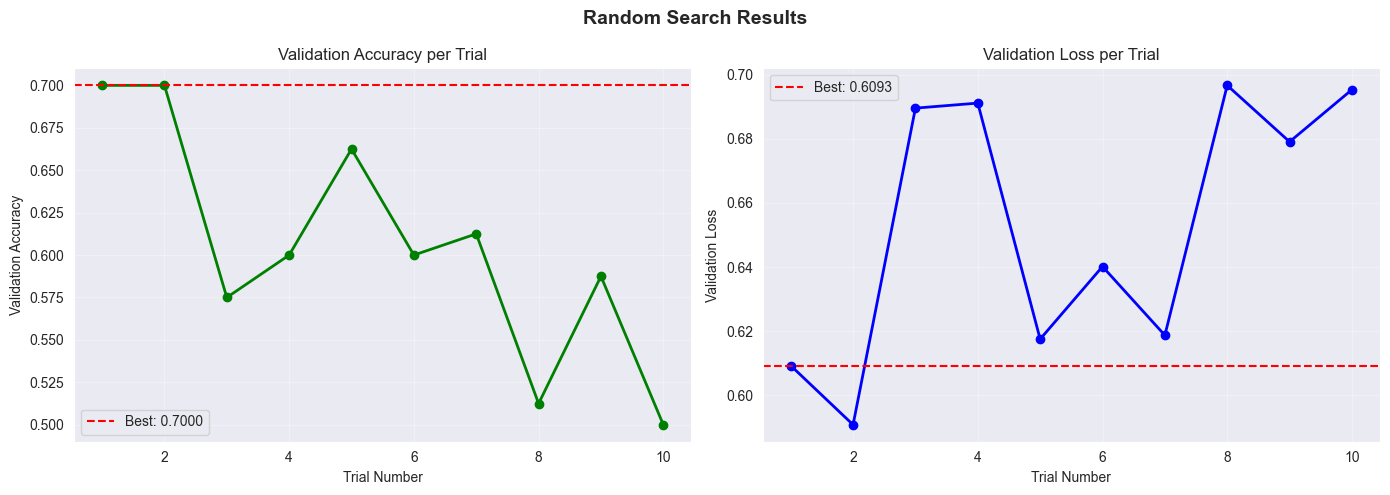


Best Random Search Configuration:
batch_size: 32
learning_rate: 0.0001
weight_decay: 0
dropout: 0.3

Best Val Accuracy: 0.7000
Best Val Loss: 0.6093


In [29]:
import matplotlib.pyplot as plt

def plot_random_search():
    """Simple plot for Random Search results"""
    with open(MODEL_SAVE_DIR / "random_search_results.json", 'r') as f:
        results = json.load(f)

    trials = [t['trial'] for t in results['all_trials']]
    val_accs = [t['val_acc'] for t in results['all_trials']]
    val_losses = [t['val_loss'] for t in results['all_trials']]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Random Search Results', fontsize=14, fontweight='bold')

    # Accuracy plot
    ax1.plot(trials, val_accs, marker='o', color='green', linewidth=2)
    ax1.axhline(y=results['best_val_acc'], color='red', linestyle='--', label=f"Best: {results['best_val_acc']:.4f}")
    ax1.set_xlabel('Trial Number')
    ax1.set_ylabel('Validation Accuracy')
    ax1.set_title('Validation Accuracy per Trial')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Loss plot
    ax2.plot(trials, val_losses, marker='o', color='blue', linewidth=2)
    ax2.axhline(y=results['best_val_loss'], color='red', linestyle='--', label=f"Best: {results['best_val_loss']:.4f}")
    ax2.set_xlabel('Trial Number')
    ax2.set_ylabel('Validation Loss')
    ax2.set_title('Validation Loss per Trial')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(MODEL_SAVE_DIR / "random_search_plot.png", dpi=300, bbox_inches='tight')
    print(f"\nPlot saved to: {MODEL_SAVE_DIR / 'random_search_plot.png'}")
    plt.show()

    # Print best params
    print(f"\n{'='*50}")
    print("Best Random Search Configuration:")
    print(f"{'='*50}")
    for param, value in results['best_params'].items():
        print(f"{param}: {value}")
    print(f"\nBest Val Accuracy: {results['best_val_acc']:.4f}")
    print(f"Best Val Loss: {results['best_val_loss']:.4f}")

# Run this after random search
plot_random_search()


Plot saved to: models\grid_search_plot.png


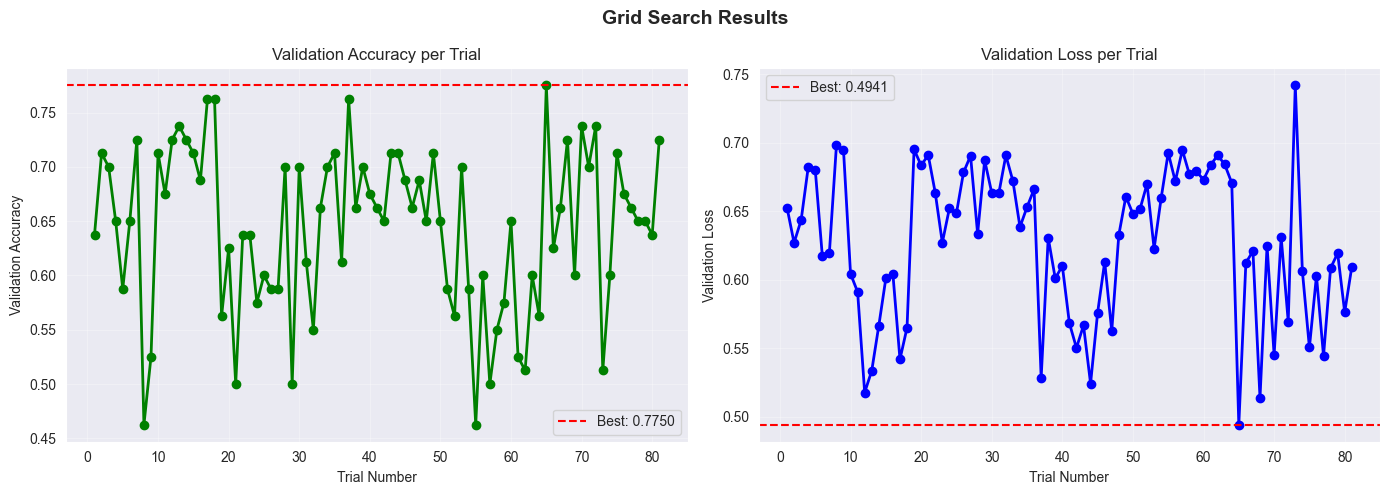


Best Grid Search Configuration:
batch_size: 32
learning_rate: 0.0001
weight_decay: 0
dropout: 0.2

Best Val Accuracy: 0.7750
Best Val Loss: 0.4941


In [30]:
def plot_grid_search():
    """Simple plot for Grid Search results"""
    with open(MODEL_SAVE_DIR / "grid_search_results.json", 'r') as f:
        results = json.load(f)

    trials = [t['trial'] for t in results['all_trials']]
    val_accs = [t['val_acc'] for t in results['all_trials']]
    val_losses = [t['val_loss'] for t in results['all_trials']]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Grid Search Results', fontsize=14, fontweight='bold')

    # Accuracy plot
    ax1.plot(trials, val_accs, marker='o', color='green', linewidth=2)
    ax1.axhline(y=results['best_val_acc'], color='red', linestyle='--', label=f"Best: {results['best_val_acc']:.4f}")
    ax1.set_xlabel('Trial Number')
    ax1.set_ylabel('Validation Accuracy')
    ax1.set_title('Validation Accuracy per Trial')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Loss plot
    ax2.plot(trials, val_losses, marker='o', color='blue', linewidth=2)
    ax2.axhline(y=results['best_val_loss'], color='red', linestyle='--', label=f"Best: {results['best_val_loss']:.4f}")
    ax2.set_xlabel('Trial Number')
    ax2.set_ylabel('Validation Loss')
    ax2.set_title('Validation Loss per Trial')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(MODEL_SAVE_DIR / "grid_search_plot.png", dpi=300, bbox_inches='tight')
    print(f"\nPlot saved to: {MODEL_SAVE_DIR / 'grid_search_plot.png'}")
    plt.show()

    # Print best params
    print(f"\n{'='*50}")
    print("Best Grid Search Configuration:")
    print(f"{'='*50}")
    for param, value in results['best_params'].items():
        print(f"{param}: {value}")
    print(f"\nBest Val Accuracy: {results['best_val_acc']:.4f}")
    print(f"Best Val Loss: {results['best_val_loss']:.4f}")

# Run this after grid search
plot_grid_search()


Comparison saved to: models\comparison.png


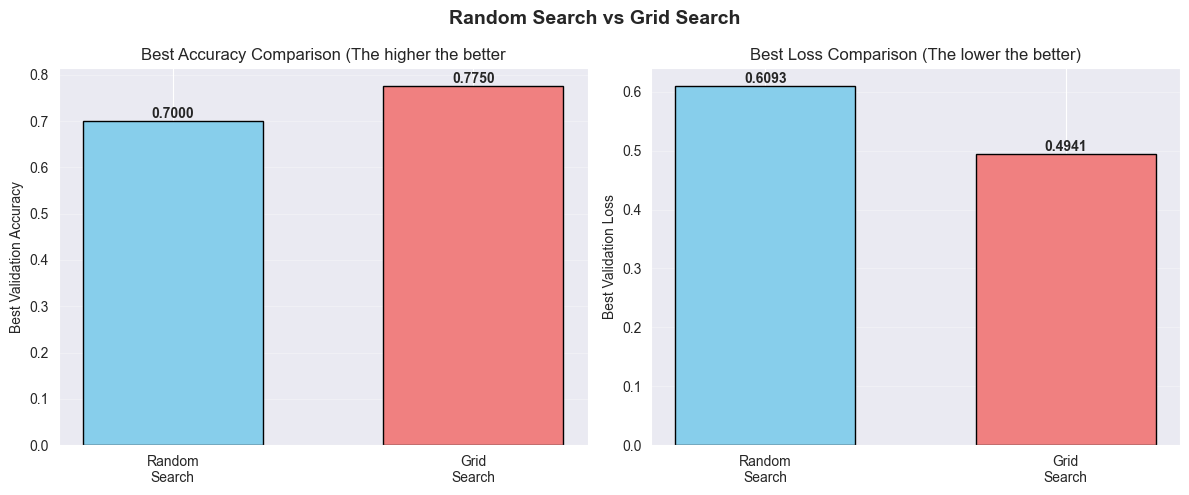


Winner:
Grid Search performed better!


In [32]:
def compare_both_searches():
    """Simple comparison of both search methods"""
    try:
        with open(MODEL_SAVE_DIR / "random_search_results.json", 'r') as f:
            random_results = json.load(f)
        with open(MODEL_SAVE_DIR / "grid_search_results.json", 'r') as f:
            grid_results = json.load(f)
    except FileNotFoundError:
        print("Run both searches first!")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Random Search vs Grid Search', fontsize=14, fontweight='bold')

    methods = ['Random\nSearch', 'Grid\nSearch']
    accs = [random_results['best_val_acc'], grid_results['best_val_acc']]
    losses = [random_results['best_val_loss'], grid_results['best_val_loss']]

    # Accuracy comparison
    bars1 = ax1.bar(methods, accs, color=['skyblue', 'lightcoral'], edgecolor='black', width=0.6)
    ax1.set_ylabel('Best Validation Accuracy')
    ax1.set_title('Best Accuracy Comparison (The higher the better')
    ax1.grid(True, alpha=0.3, axis='y')

    for bar, acc in zip(bars1, accs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    # Loss comparison
    bars2 = ax2.bar(methods, losses, color=['skyblue', 'lightcoral'], edgecolor='black', width=0.6)
    ax2.set_ylabel('Best Validation Loss')
    ax2.set_title('Best Loss Comparison (The lower the better)')
    ax2.grid(True, alpha=0.3, axis='y')

    for bar, loss in zip(bars2, losses):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig(MODEL_SAVE_DIR / "comparison.png", dpi=300, bbox_inches='tight')
    print(f"\nComparison saved to: {MODEL_SAVE_DIR / 'comparison.png'}")
    plt.show()

    print(f"\n{'='*50}")
    print("Winner:")
    print(f"{'='*50}")
    if random_results['best_val_acc'] > grid_results['best_val_acc']:
        print("Random Search performed better!")
    elif grid_results['best_val_acc'] > random_results['best_val_acc']:
        print("Grid Search performed better!")
    else:
        print("Both methods performed equally!")

# Run this after both searches
compare_both_searches()

Classification Report:

              precision    recall  f1-score   support

    fighting     0.5061    0.2470    0.3320      1000
not_fighting     0.5020    0.7590    0.6043      1000

    accuracy                         0.5030      2000
   macro avg     0.5041    0.5030    0.4681      2000
weighted avg     0.5041    0.5030    0.4681      2000



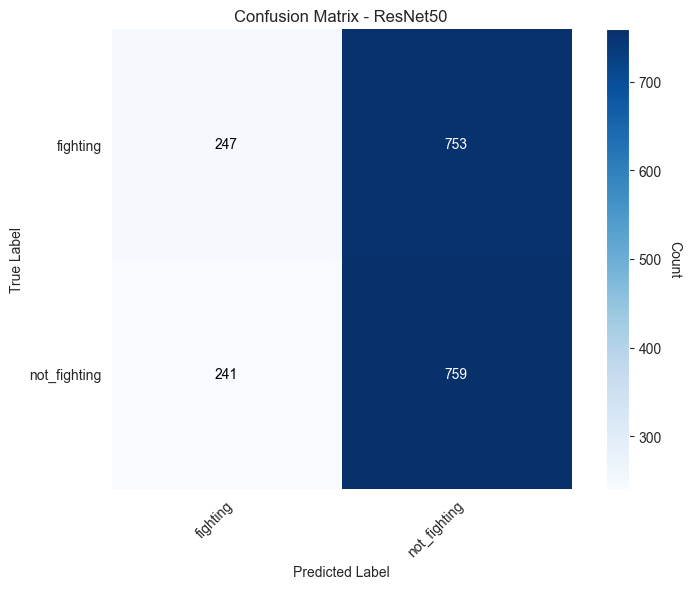


Confusion matrix saved to `resnet50_confusion_matrix_clean.png`


In [6]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torchvision.models import resnet50
from pathlib import Path
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Paths and device
IMAGES_ROOT = Path("Images_augmented")
MODEL_PATH = Path("models") / "resnet50_frequency_best.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Standard ImageNet mean/std
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Transform (validation)
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Load dataset
val_dataset = datasets.ImageFolder(root=str(IMAGES_ROOT), transform=val_transform)
class_names = val_dataset.classes
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

# Build model (same architecture as training)
num_classes = len(class_names)
model = resnet50(weights=None)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model = model.to(DEVICE)

# Load trained weights
state = torch.load(MODEL_PATH, map_location=DEVICE)
model.load_state_dict(state)
model.eval()

# Run inference
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)
print("Classification Report:\n")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# ---- Plot Confusion Matrix (No grid lines, clean style) ----
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

# Set labels and ticks
ax.set(
    xticks=np.arange(len(class_names)),
    yticks=np.arange(len(class_names)),
    xticklabels=class_names,
    yticklabels=class_names,
    ylabel="True Label",
    xlabel="Predicted Label",
    title="Confusion Matrix - ResNet50"
)

# Rotate x-tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# ---- Remove grid lines and frame clutter ----
ax.grid(False)  # removes grid lines between cells
ax.spines[:].set_visible(False)  # hides outer box lines

# Tight layout and save
plt.tight_layout()
out_path = Path("resnet50_confusion_matrix_clean.png")
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

print(f"\nConfusion matrix saved to `{out_path}`")

In [60]:
# Prediction function for ResNet50
def predict_image_resnet50(model, image_path, class_names):
    """Predict a single image using ResNet50"""
    from PIL import Image

    # Use ImageNet normalization values
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ])

    # Load and transform image
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(DEVICE)

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]
        confidence, predicted = torch.max(probabilities, 0)

    return {
        'predicted_class': class_names[predicted.item()],
        'confidence': confidence.item(),
        'probabilities': {class_names[i]: probabilities[i].item() for i in range(len(class_names))}
    }

print("ResNet50 prediction function defined")

ResNet50 prediction function defined


In [61]:
# Test prediction on sample images
import os
import random

# Get sample images from both classes
sample_images = []
for class_name in class_names:
    class_dir = IMAGES_ROOT / class_name
    images = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))
    if images:
        sample_images.extend(random.sample(images, min(3, len(images))))

print(f"Testing ResNet50 on {len(sample_images)} sample images:\n")

for img_path in sample_images:
    result = predict_image_resnet50(resnet_model, img_path, class_names)
    print(f"Image: {img_path.name}")
    print(f"  Predicted: {result['predicted_class']}")
    print(f"  Confidence: {result['confidence']:.4f}")
    print(f"  Probabilities: {result['probabilities']}")
    print()

Testing ResNet50 on 6 sample images:

Image: x4.jpg
  Predicted: fighting
  Confidence: 0.8493
  Probabilities: {'fighting': 0.8492648601531982, 'not_fighting': 0.15073512494564056}

Image: 62.jpg
  Predicted: fighting
  Confidence: 0.7388
  Probabilities: {'fighting': 0.7388153076171875, 'not_fighting': 0.2611847221851349}

Image: 166.jpg
  Predicted: fighting
  Confidence: 0.9459
  Probabilities: {'fighting': 0.945880115032196, 'not_fighting': 0.05411984398961067}

Image: gettyimages-525148583-2048x2048.jpg
  Predicted: not_fighting
  Confidence: 0.9963
  Probabilities: {'fighting': 0.0036952467635273933, 'not_fighting': 0.9963047504425049}

Image: x56.jpg
  Predicted: not_fighting
  Confidence: 0.9477
  Probabilities: {'fighting': 0.0523008294403553, 'not_fighting': 0.947699248790741}

Image: x25.jpg
  Predicted: not_fighting
  Confidence: 0.9966
  Probabilities: {'fighting': 0.0033795631024986506, 'not_fighting': 0.9966204166412354}



### Detecting videos (deprecated)


In [125]:
MODEL_PATH = "best_fight_detection_cnn.pth"
FRAMES_DIR = "./Processed_Frames/non_fight/video_1"
device = "cpu"

# Allowlist, then load with weights_only=False (trusted local checkpoint)
add_safe_globals([FightDetectionCNN])
ckpt = torch.load(MODEL_PATH, map_location=device, weights_only=False)

if isinstance(ckpt, nn.Module):
    model = ckpt
elif isinstance(ckpt, dict):
    model = FightDetectionCNN(num_classes=2, pretrained=False)
    model.load_state_dict(ckpt, strict=False)
else:
    raise TypeError("Unsupported checkpoint format.")

model.to(device).eval()

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

class_names = ["non_fight", "fight"]

def predict_video_frames(frames_dir: str) -> np.ndarray:
    exts = {".png", ".jpg", ".jpeg", ".bmp"}
    files = [f for f in os.listdir(frames_dir) if os.path.splitext(f)[1].lower() in exts]
    files = [(f, os.path.splitext(f)[0]) for f in files if os.path.splitext(f)[0].isdigit()]
    files.sort(key=lambda t: int(t[1]))
    files = [f for f, _ in files]

    results = []
    with torch.no_grad():
        for f in files:
            img = Image.open(os.path.join(frames_dir, f)).convert("RGB")
            x = transform(img).unsqueeze(0).to(device)
            logits = model(x)
            probs = torch.softmax(logits, dim=1)
            pred_idx = int(torch.argmax(probs, dim=1).item())
            results.append(1 if class_names[pred_idx] == "fight" else 0)
    return np.array(results, dtype=np.int64)

fight_array = predict_video_frames(FRAMES_DIR)
print(fight_array)

[0 1]


In [130]:
BASE_DIR = "./Processed_Frames"

results_summary = {}

for category in ["fight", "non_fight"]:
    category_path = os.path.join(BASE_DIR, category)
    for video_folder in os.listdir(category_path):
        video_path = os.path.join(category_path, video_folder)
        if not os.path.isdir(video_path):
            continue

        print(f"Processing {video_path} ...")
        fight_array = predict_video_frames(video_path)
        results_summary[f"{category}/{video_folder}"] = fight_array

print("\n All videos processed!")


Processing ./Processed_Frames/fight/video_2 ...
Processing ./Processed_Frames/fight/video_5 ...
Processing ./Processed_Frames/fight/video_4 ...
Processing ./Processed_Frames/fight/video_3 ...
Processing ./Processed_Frames/fight/video_89 ...
Processing ./Processed_Frames/fight/video_42 ...
Processing ./Processed_Frames/fight/video_45 ...
Processing ./Processed_Frames/fight/video_73 ...
Processing ./Processed_Frames/fight/video_87 ...
Processing ./Processed_Frames/fight/video_80 ...
Processing ./Processed_Frames/fight/video_74 ...
Processing ./Processed_Frames/fight/video_20 ...
Processing ./Processed_Frames/fight/video_135 ...
Processing ./Processed_Frames/fight/video_27 ...
Processing ./Processed_Frames/fight/video_132 ...
Processing ./Processed_Frames/fight/video_18 ...
Processing ./Processed_Frames/fight/video_104 ...
Processing ./Processed_Frames/fight/video_11 ...
Processing ./Processed_Frames/fight/video_103 ...
Processing ./Processed_Frames/fight/video_16 ...
Processing ./Process